# 1. Data Pre-processing

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf

from pathlib import Path
from sklearn.linear_model import ElasticNet, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

from google.colab import files

Mounted at /content/drive


In [ ]:
# Set our current working directory to the folder with data
path = "/content/drive/MyDrive/Courses/Junior/BUS310/Group Assignment 3/Group 5_Assignment 3/Data/data"

In [ ]:
# Get list of all CSV files: 16 cities
all_files = glob.glob(os.path.join(path, "*.csv"))

# Filter out the merged file if it exists
all_files = [f for f in all_files if "data_merged" not in f]

# Read and combine
df_list = []

for file in all_files:
    temp = pd.read_csv(file)
    temp["city"] = os.path.basename(file).replace("_listings.csv", "")
    df_list.append(temp)

In [ ]:
# Merge into one big dataframe
df = pd.concat(df_list, ignore_index=True)

## Understand the Data

In [ ]:
df.shape

(213171, 80)

In [ ]:
df["city"].value_counts()

city
los angeles.csv    45421
hawaii.csv         36452
nyc.csv            36403
austin.csv         15187
san diego.csv      12959
nashville.csv       9698
chicago.csv         8604
new orleans.csv     7522
seattle.csv         6862
dc.csv              6423
dallas.csv          5723
twin cities.csv     5298
denver.csv          4888
boston.csv          4560
portland.csv        4332
columbus.csv        2839
Name: count, dtype: int64

In [ ]:
# Print the first 15 datapoints
df.head(15)

id                          listing_url       scrape_id last_scraped  \
0     2384    https://www.airbnb.com/rooms/2384  20250617145442   2025-06-17   
1     7126    https://www.airbnb.com/rooms/7126  20250617145442   2025-06-18   
2    10945   https://www.airbnb.com/rooms/10945  20250617145442   2025-06-17   
3    12140   https://www.airbnb.com/rooms/12140  20250617145442   2025-06-18   
4    28749   https://www.airbnb.com/rooms/28749  20250617145442   2025-06-18   
5    71930   https://www.airbnb.com/rooms/71930  20250617145442   2025-06-17   
6    94450   https://www.airbnb.com/rooms/94450  20250617145442   2025-06-17   
7   145659  https://www.airbnb.com/rooms/145659  20250617145442   2025-06-17   
8   145690  https://www.airbnb.com/rooms/145690  20250617145442   2025-06-17   
9   189821  https://www.airbnb.com/rooms/189821  20250617145442   2025-06-17   
10  207218  https://www.airbnb.com/rooms/207218  20250617145442   2025-06-17   
11  207351  https://www.airbnb.com/rooms/207351  20250617145442   2025-06-17   
12  220333  https://www.airbnb.com/rooms/220333  20250617145442   2025-06-17   
13  225314  https://www.airbnb.com/rooms/225314  20250617145442   2025-06-17   
14  233933  https://www.airbnb.com/rooms/233933  20250617145442   2025-06-17   

         source                                               name  \
0   city scrape          Hyde Park - Walk to University of Chicago   
1   city scrape                Tiny Studio Apartment 94 Walk Score   
2   city scrape                              The Biddle House (#1)   
3   city scrape                           Lincoln Park Guest House   
4   city scrape         Quirky Bucktown Loft w/ Parking No Parties   
5   city scrape                            Rest, Relax and Explore   
6   city scrape                Comfy Garden Suite in Andersonville   
7   city scrape        Trendy Roscoe Village 3BR/2BR walk to shops   
8   city scrape  4BR/2BR Walk to North Ave Beach & Zoo~Close to El   
9   city scrape     Best in Chicago, private, amazing garden space   
10  city scrape      Historic Pullman Artist Flat - Monthly Rental   
11  city scrape   Pullman Art Studio - One Person - Monthly Rental   
12  city scrape    Pullman School House Apartment - monthly rental   
13  city scrape  Cozy & comfy with AC close to California Blue ...   
14  city scrape      Lovely Bedroom 3 in a New Renovated Apartment   

                                          description  \
0   Solo Hyde Park visitors are welcome to book th...   
1    A very small studio in a wonderful neighborhood.   
2   Beautiful first floor apartment in Historic Ol...   
3   Bed and Breakfast license issued by the City o...   
4   Located on a peaceful treelined street in ener...   
5   A peaceful shared space in Chicago's Ukrainian...   
6   In the very heart of Andersonville.  A comfort...   
7   Awesome 3 bedroom/2 bathroom in one of Chicago...   
8   This is a fantastic 4 bedroom/2 Bathroom that ...   
9   We offer the highest standards of cleanliness....   
10  Charming original 1880's Pullman workers flat ...   
11  Creative space! 1st floor Artist studio in an ...   
12  An unusual MONTHLY rental in the heart of Pull...   
13  Comfortable room near the California Blue Line...   
14  This is one of two rooms in my apartment that ...   

                                neighborhood_overview  \
0   The apartment is less than one block from beau...   
1   Ukrainian Village was just named "Hottest Neig...   
2                                                 NaN   
3   The Guest House is in the heart of Chicago's m...   
4   Bucktown is a thriving community on the Northw...   
5   Ukrainian Village / West Town is a beautifully...   
6   A neighborhood on Chicago’s north side, Anders...   
7   Trendy Roscoe Village offers a variety of bout...   
8   Trendy Old Town offers boutique shopping and a...   
9   Enjoy the unique green spaces at the heart of ...   
10  The entire town of Pullman was built in the 18...   
11  NOTES

## Handle missing data

In [ ]:
# Count missing values
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a DataFrame
missing_data = pd.DataFrame({
    'Missing_Count': missing_count,
    'Percentage': missing_percentage
})

# Sort by percentage (highest first) and filter out columns with no missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Percentage', ascending=False)

print("Missing Data Analysis")
print(f"\nColumns with missing values: {len(missing_data)}")
print(missing_data)

Missing Data Analysis

Columns with missing values: 45
                              Missing_Count  Percentage
calendar_updated                     213171  100.000000
license                              117875   55.295983
neighborhood_overview                102182   47.934287
neighbourhood                        102179   47.932880
neighbourhood_group_cleansed          88033   41.296893
host_about                            84147   39.473943
host_location                         48369   22.690235
review_scores_location                47235   22.158267
review_scores_value                   47235   22.158267
review_scores_checkin                 47231   22.156391
review_scores_accuracy                47216   22.149354
review_scores_communication           47211   22.147009
review_scores_cleanliness             47204   22.143725
reviews_per_month                     47166   22.125899
review_scores_rating                  47166   22.125899
last_review                           47166   22.

In [ ]:
# Drop columns with high missing percentage (>50%)
high_missing_cols = ['calendar_updated', 'license']

df = df.drop(columns=high_missing_cols)

In [ ]:
# Drop columns that won't help with price prediction
non_predictive_cols = [
    'picture_url', 'host_picture_url', 'host_thumbnail_url',  # URLs
    'description', 'host_about', 'host_location',  # Text fields
    'host_name', 'name',  # Names
    'host_verifications'  # Complex list data
]

df = df.drop(columns=non_predictive_cols, errors='ignore')

In [ ]:
# Drop rows where price (target variable) is missing
df = df.dropna(subset=['price'])

In [ ]:
# Impute review scores with median
review_cols = ['review_scores_rating', 'review_scores_accuracy',
               'review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location',
               'review_scores_value']

for col in review_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-4080175582.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
# For reviews_per_month, first_review, last_review
df['reviews_per_month'].fillna(0, inplace=True)
df = df.drop(columns=['first_review', 'last_review'], errors='ignore')  # Drop dates

/tmp/ipython-input-1393932229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [ ]:
# For bedrooms, beds, bathrooms - Impute with median
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)

/tmp/ipython-input-507613630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
/tmp/ipython-input-507613630.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# For host features - Impute with median

## Convert percentage columns safely
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace('%', ''), errors='coerce')
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'].str.replace('%', ''), errors='coerce')

## Impute
df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median(), inplace=True)
df['host_is_superhost'].fillna('f', inplace=True)  # Assume not superhost if missing

/tmp/ipython-input-3936693823.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
/tmp/ipython-input-3936693823.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

## Handle Amnemities

In [ ]:
import ast

def parse_amenities(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

In [ ]:
# Parse the amenities column into Python lists
df['amenities_list'] = df['amenities'].apply(parse_amenities)

df['amenities_count'] = df['amenities_list'].apply(len)

In [ ]:
from collections import Counter

# Select top 10 amenities
all_amenities = [item for sublist in df['amenities_list'] for item in sublist]
amenity_counts = Counter(all_amenities)

k = 10
top_10_amenities = [a for a, cnt in amenity_counts.most_common(k)]

# Clean names
def clean_name(a):
    return (
        a.strip()
        .replace(" ", "_")
        .replace("-", "_")
        .replace("&", "and")
        .replace("/", "_")
        .replace("(", "")
        .replace(")", "")
    )

clean_top_10 = [clean_name(a) for a in top_10_amenities]

In [ ]:
# Create dummy features for top 10 amenities
for orig, clean in zip(top_10_amenities, clean_top_10):
    df[f"amenity_{clean}"] = df['amenities_list'].apply(lambda x: 1 if orig in x else 0)

In [ ]:
#Count each amenity across all listings
from collections import Counter

all_amenities = [item for sublist in df['amenities_list'] for item in sublist]
amenity_counts = Counter(all_amenities)

In [ ]:
#Choose the Top 10 Most Common Amenities
k = 10
top_10_amenities = [amenity for amenity, count in amenity_counts.most_common(k)]
print(top_10_amenities)

['Smoke alarm', 'Wifi', 'Kitchen', 'Hot water', 'Carbon monoxide alarm', 'Hair dryer', 'Hangers', 'Essentials', 'Dishes and silverware', 'Microwave']


In [ ]:
# Create binary dummy variables only for the top 10
for amenity in top_10_amenities:
    df[f'amenity_{amenity}'] = df['amenities_list'].apply(lambda x: 1 if amenity in x else 0)

## Handle neighbourhood

In [ ]:
# Identify top 5 neighborhoods by city
top_neigh_by_city = (
    df.groupby('city')['neighbourhood_cleansed']
      .value_counts()
      .groupby(level=0)
      .nlargest(5)
)

In [ ]:
# Label all others as “Other”
def filter_neigh(row):
    city = row['city']
    neigh = row['neighbourhood_cleansed']
    top_list = top_neigh_by_city[city].index.get_level_values(1)
    return neigh if neigh in top_list else 'Other'

df['neigh_filtered'] = df.apply(filter_neigh, axis=1)

# 2. Exploratory Data Analysis

TARGET VARIABLE: PRICE ANALYSIS

Price Statistics:
  Mean: $502.36
  Median: $169.00
  Std Dev: $3148.11
  Min: $3.00
  Max: $100000.00
  25th percentile: $103.00
  75th percentile: $287.00
  99th percentile: $3000.00

Outliers detected: 15,102 (8.96% of data)


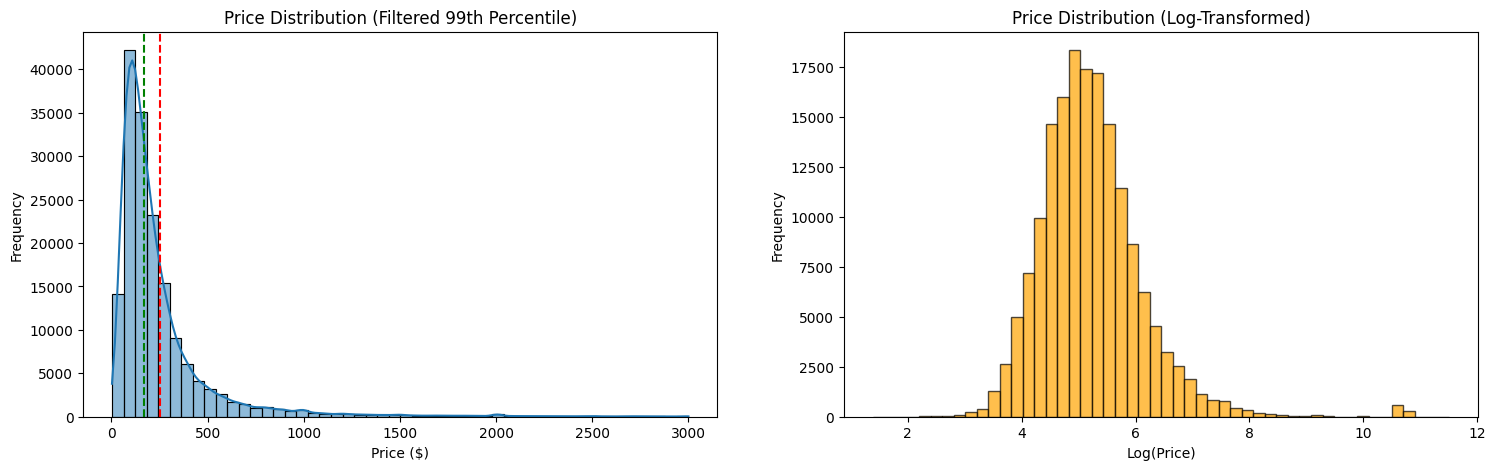

In [ ]:
# TARGET VARIABLE ANALYSIS: PRICE
print("TARGET VARIABLE: PRICE ANALYSIS")

# Clean column: Remove dollar signs and convert to float
df['price'] = df['price'].astype(str)
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Price statistics
print(f"\nPrice Statistics:")
print(f"  Mean: ${df['price'].mean():.2f}")
print(f"  Median: ${df['price'].median():.2f}")
print(f"  Std Dev: ${df['price'].std():.2f}")
print(f"  Min: ${df['price'].min():.2f}")
print(f"  Max: ${df['price'].max():.2f}")
print(f"  25th percentile: ${df['price'].quantile(0.25):.2f}")
print(f"  75th percentile: ${df['price'].quantile(0.75):.2f}")
print(f"  99th percentile: ${df['price'].quantile(0.99):.2f}")

# Price distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Original distribution
df_plot = df[df['price'] <= df['price'].quantile(0.99)]

sns.histplot(df_plot['price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Price Distribution (Filtered 99th Percentile)")
axes[0].set_xlabel("Price ($)")
axes[0].set_ylabel("Frequency")
axes[0].axvline(df_plot['price'].mean(), color='red', linestyle='--')
axes[0].axvline(df_plot['price'].median(), color='green', linestyle='--')

# Log-transformed distribution
axes[1].hist(np.log1p(df['price']), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Log(Price)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Price Distribution (Log-Transformed)')

# Check for outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < Q1 - 1.5*IQR) | (df['price'] > Q3 + 1.5*IQR)]
print(f"\nOutliers detected: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}% of data)")

PRICE BY CITY
                 count    mean  median      std
city                                           
hawaii.csv       32172  906.44   247.0  4519.60
boston.csv        3695  736.23   193.0  4652.22
san diego.csv    11604  706.46   211.0  4023.43
chicago.csv       7681  577.54   169.0  3879.02
new orleans.csv   6373  537.22   135.0  3745.72
seattle.csv       6227  473.94   177.0  3290.41
nyc.csv          21279  447.87   150.0  3174.21
dc.csv            4846  392.26   135.0  3126.67
dallas.csv        5373  386.70   110.0  3088.20
austin.csv       10708  386.47   138.0  2620.20
portland.csv      3698  336.28   110.0  2788.64
los angeles.csv  36405  301.30   161.0   840.06
twin cities.csv   4827  260.13   138.0  1607.05
nashville.csv     6854  221.82   158.0  1217.92
denver.csv        4238  193.84   139.0   252.76
columbus.csv      2594  129.63   102.0   115.71


<Figure size 1400x600 with 0 Axes>

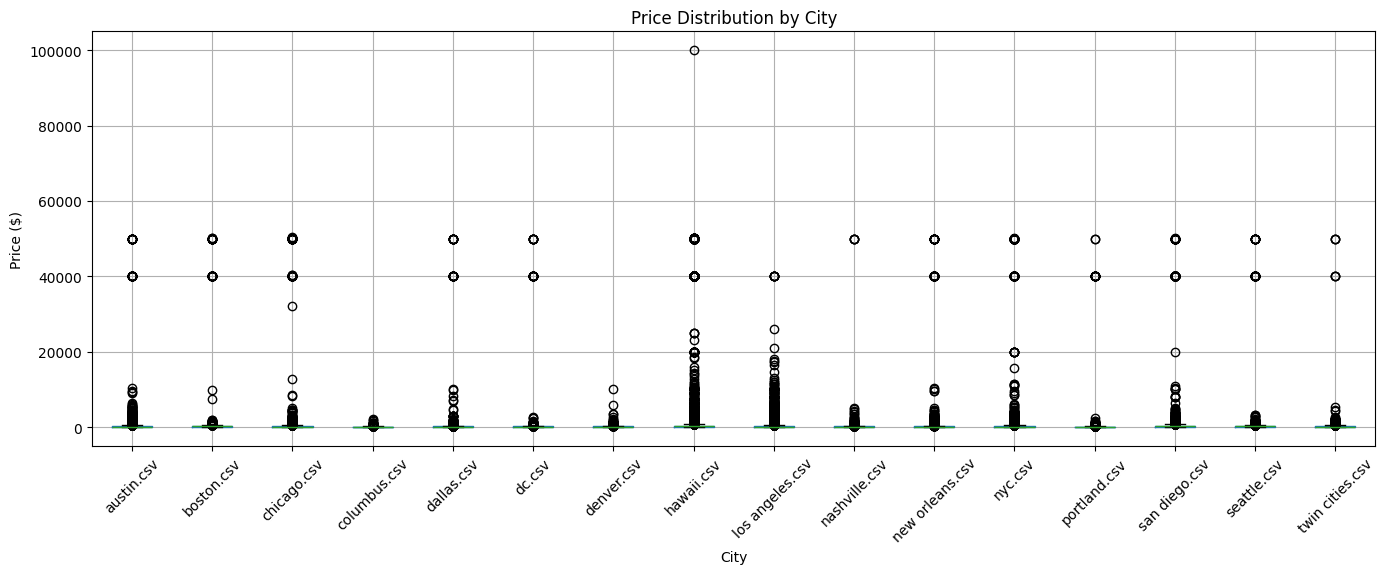

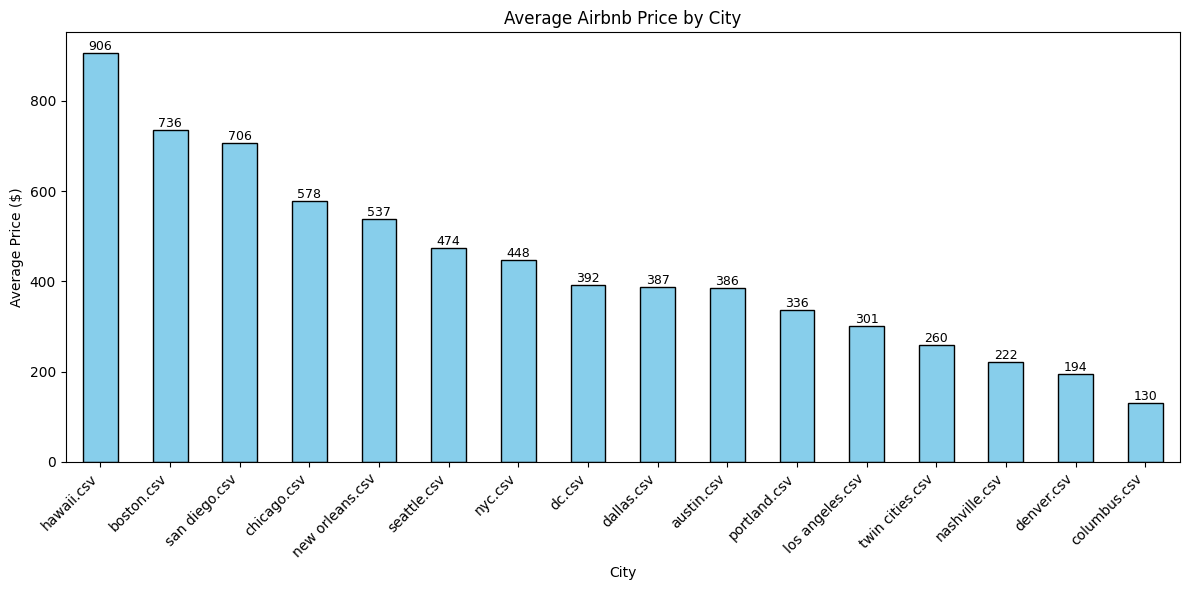

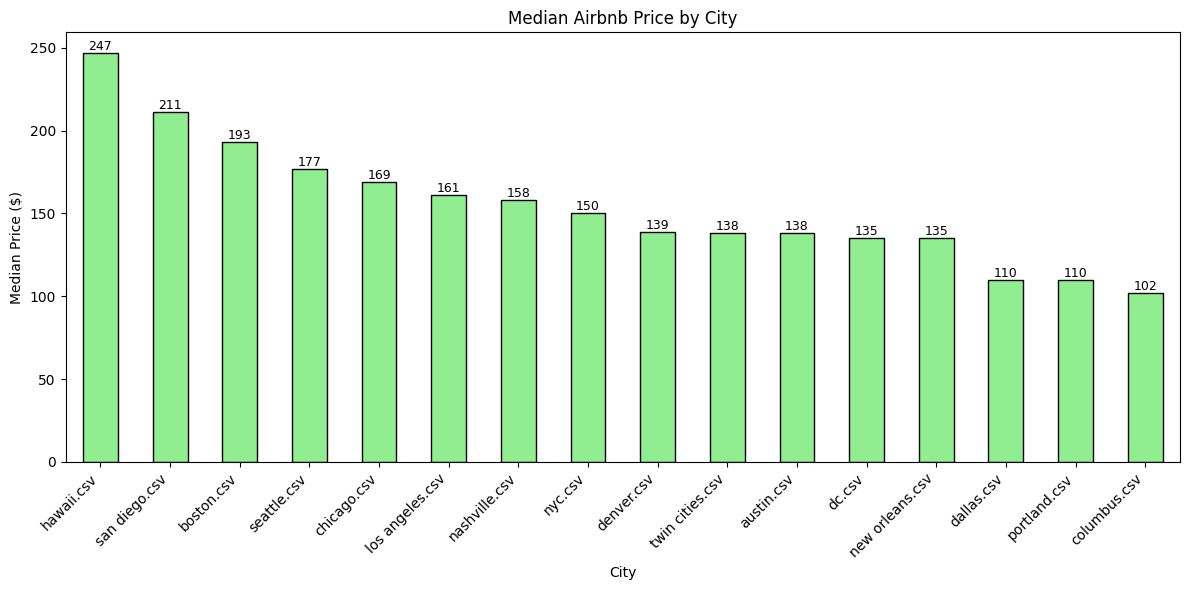

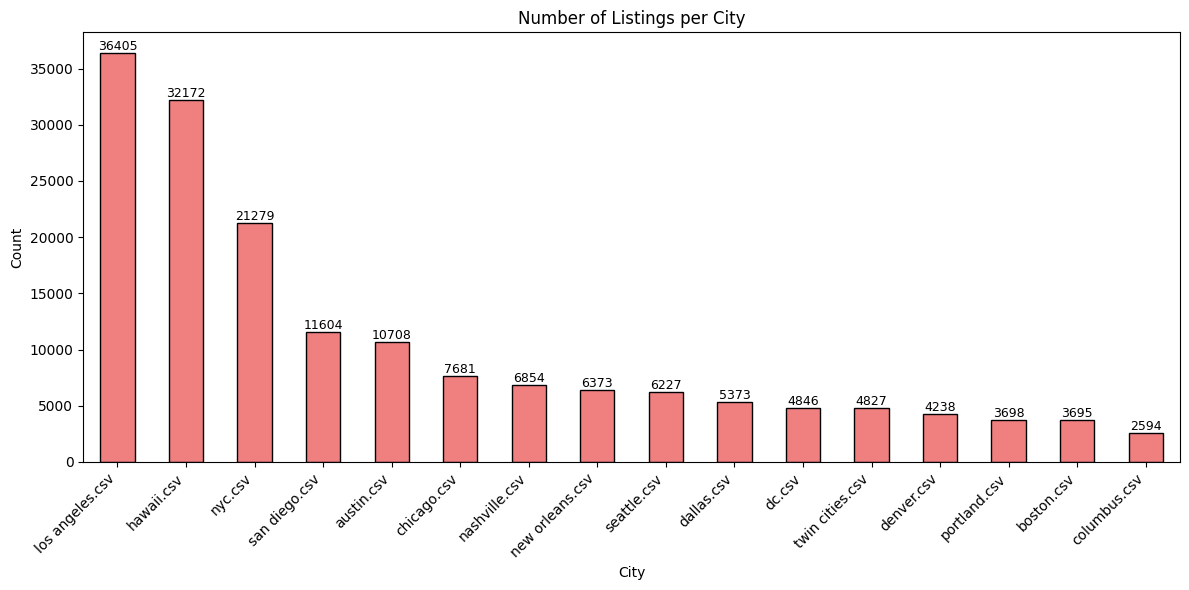

In [ ]:
# PRICE BY CITY
print("PRICE BY CITY")

city_stats = df.groupby('city')['price'].agg(['count', 'mean', 'median', 'std']).round(2)
city_stats = city_stats.sort_values('mean', ascending=False)
print(city_stats)

# Visualize price by city
plt.figure(figsize=(14, 6))
df.boxplot(column='price', by='city', figsize=(14, 6), rot=45)
plt.title('Price Distribution by City')
plt.suptitle('')  # Remove default title
plt.xlabel('City')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

# Bar chart of average price by city
plt.figure(figsize=(12, 6))
city_avg = df.groupby('city')['price'].mean().sort_values(ascending=False)
ax1 = city_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Airbnb Price by City')
plt.xlabel('City')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
for p in ax1.patches:
    ax1.annotate(
        f'{p.get_height():.0f}',     # text displayed on top
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=9
    )
plt.tight_layout()
plt.show()

# Bar chart of median price by city
plt.figure(figsize=(12, 6))
city_median = df.groupby('city')['price'].median().sort_values(ascending=False)
ax2 = city_median.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Median Airbnb Price by City')
plt.xlabel('City')
plt.ylabel('Median Price ($)')
plt.xticks(rotation=45, ha='right')
for p in ax2.patches:
    ax2.annotate(
        f'{p.get_height():.0f}',     # text displayed on top
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=9
    )
plt.tight_layout()
plt.show()

# Number of Listings per City
plt.figure(figsize=(12, 6))
ax3 = df['city'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Number of Listings per City')
plt.ylabel('Count')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')
for p in ax3.patches:
    ax3.annotate(
        f'{p.get_height():.0f}',     # text displayed on top
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=9
    )
plt.tight_layout()
plt.show()

In [ ]:
# Group property_type into broader categories
def simplify_property_type(pt):
    pt = pt.lower()

    if "entire" in pt:
        return "Entire place"
    elif "private" in pt:
        return "Private room"
    elif "shared" in pt:
        return "Shared room"
    elif "hotel" in pt:
        return "Hotel"
    else:
        return "Unique stay"

df["property_type_simplified"] = df["property_type"].apply(simplify_property_type)

In [ ]:
# CATEGORICAL VARIABLES ANALYSIS
print("CATEGORICAL VARIABLES")

categorical_cols = ['room_type', 'property_type_simplified']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print(df[col].value_counts())
        print(f"\nAverage price by {col}:")
        print(df.groupby(col)['price'].mean().sort_values(ascending=False).round(2))

CATEGORICAL VARIABLES

ROOM_TYPE:
room_type
Entire home/apt    134727
Private room        31785
Hotel room           1310
Shared room           752
Name: count, dtype: int64

Average price by room_type:
room_type
Hotel room         19932.77
Entire home/apt      377.95
Private room         239.07
Shared room           71.10
Name: price, dtype: float64

PROPERTY_TYPE_SIMPLIFIED:
property_type_simplified
Entire place    132933
Private room     28455
Hotel             4916
Unique stay       1518
Shared room        752
Name: count, dtype: int64

Average price by property_type_simplified:
property_type_simplified
Hotel           6189.58
Entire place     380.28
Unique stay      264.55
Private room     114.20
Shared room       71.10
Name: price, dtype: float64


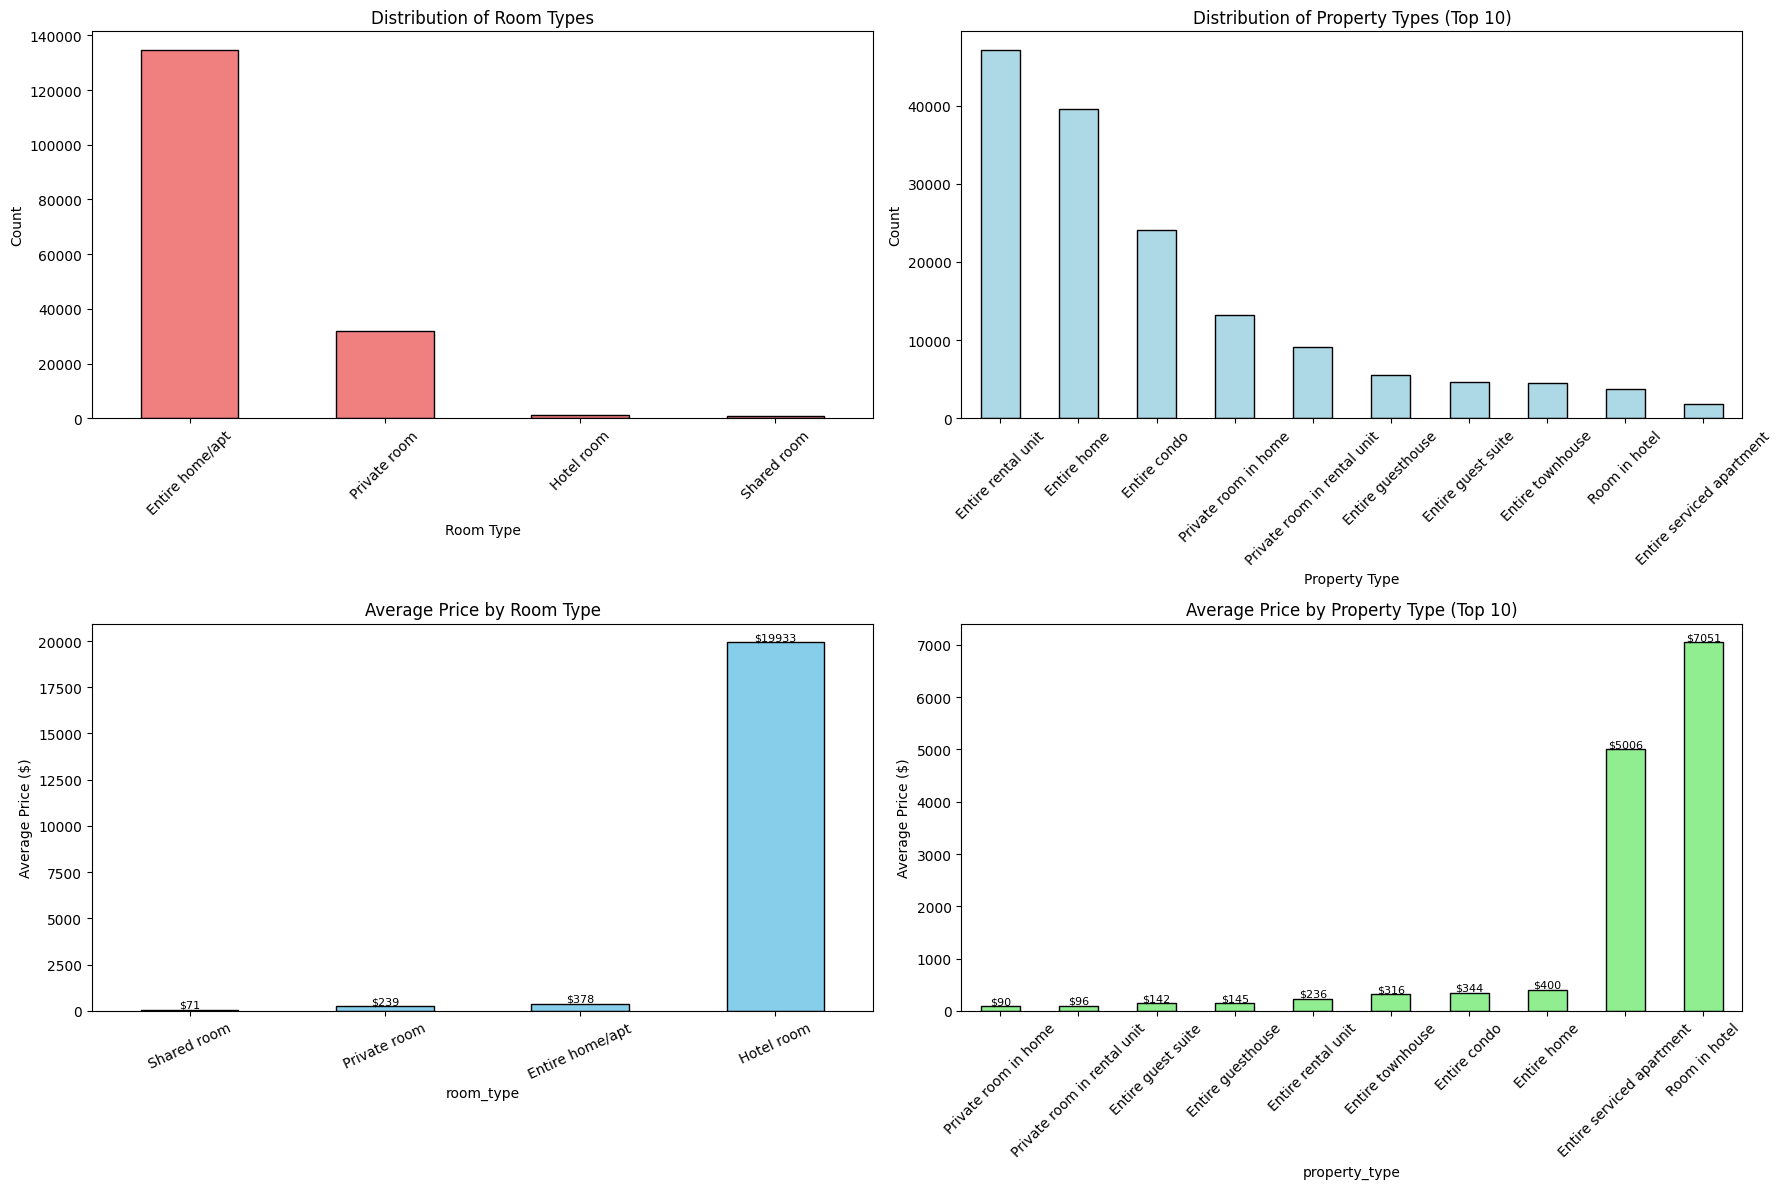

In [ ]:
# CATEGORICAL VARIABLES ANALYSIS: VISUALIZATION

# Select top property types
top_props = df['property_type'].value_counts().nlargest(10)
top_prop_names = top_props.index
df_prop = df[df['property_type'].isin(top_prop_names)]

# Compute averages
room_avg = df.groupby('room_type')['price'].mean().sort_values()
prop_avg = df_prop.groupby('property_type')['price'].mean().sort_values()

# 2 rows × 2 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Distribution of Room Types (Count Plot)
df['room_type'].value_counts().plot(
    kind='bar',
    ax=axes[0, 0],
    color='lightcoral',
    edgecolor='black'
)
axes[0, 0].set_title('Distribution of Room Types')
axes[0, 0].set_xlabel('Room Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Distribution of Top 10 Property Types
top_props.plot(
    kind='bar',
    ax=axes[0, 1],
    color='lightblue',
    edgecolor='black'
)
axes[0, 1].set_title('Distribution of Property Types (Top 10)')
axes[0, 1].set_xlabel('Property Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Average Price by Room Type
ax = room_avg.plot(
    kind='bar',
    ax=axes[1, 0],
    color='skyblue',
    edgecolor='black'
)
axes[1, 0].set_title('Average Price by Room Type')
axes[1, 0].set_ylabel('Average Price ($)')
axes[1, 0].tick_params(axis='x', rotation=25)

# Add labels
for p in ax.patches:
    axes[1, 0].annotate(
        f'${p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=8
    )

# Average Price by Top 10 Property Type
ax2 = prop_avg.plot(
    kind='bar',
    ax=axes[1, 1],
    color='lightgreen',
    edgecolor='black'
)
axes[1, 1].set_title('Average Price by Property Type (Top 10)')
axes[1, 1].set_ylabel('Average Price ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Add labels
for p in ax2.patches:
    axes[1, 1].annotate(
        f'${p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=8
    )

plt.tight_layout()
plt.show()

NUMERICAL FEATURES

Numerical Features Statistics:
       accommodates   bedrooms  bathrooms  number_of_reviews  \
count     168574.00  168574.00  168574.00          168574.00   
mean           4.43       1.76       1.57              53.71   
std            2.99       1.32       1.01             101.36   
min            1.00       0.00       0.00               0.00   
25%            2.00       1.00       1.00               1.00   
50%            4.00       1.00       1.00              13.00   
75%            6.00       2.00       2.00              61.00   
max           16.00      57.00      44.00            3518.00   

       review_scores_rating  review_scores_accuracy  \
count             168574.00               168574.00   
mean                   4.81                    4.83   
std                    0.33                    0.32   
min                    0.00                    0.00   
25%                    4.80                    4.83   
50%                    4.90               

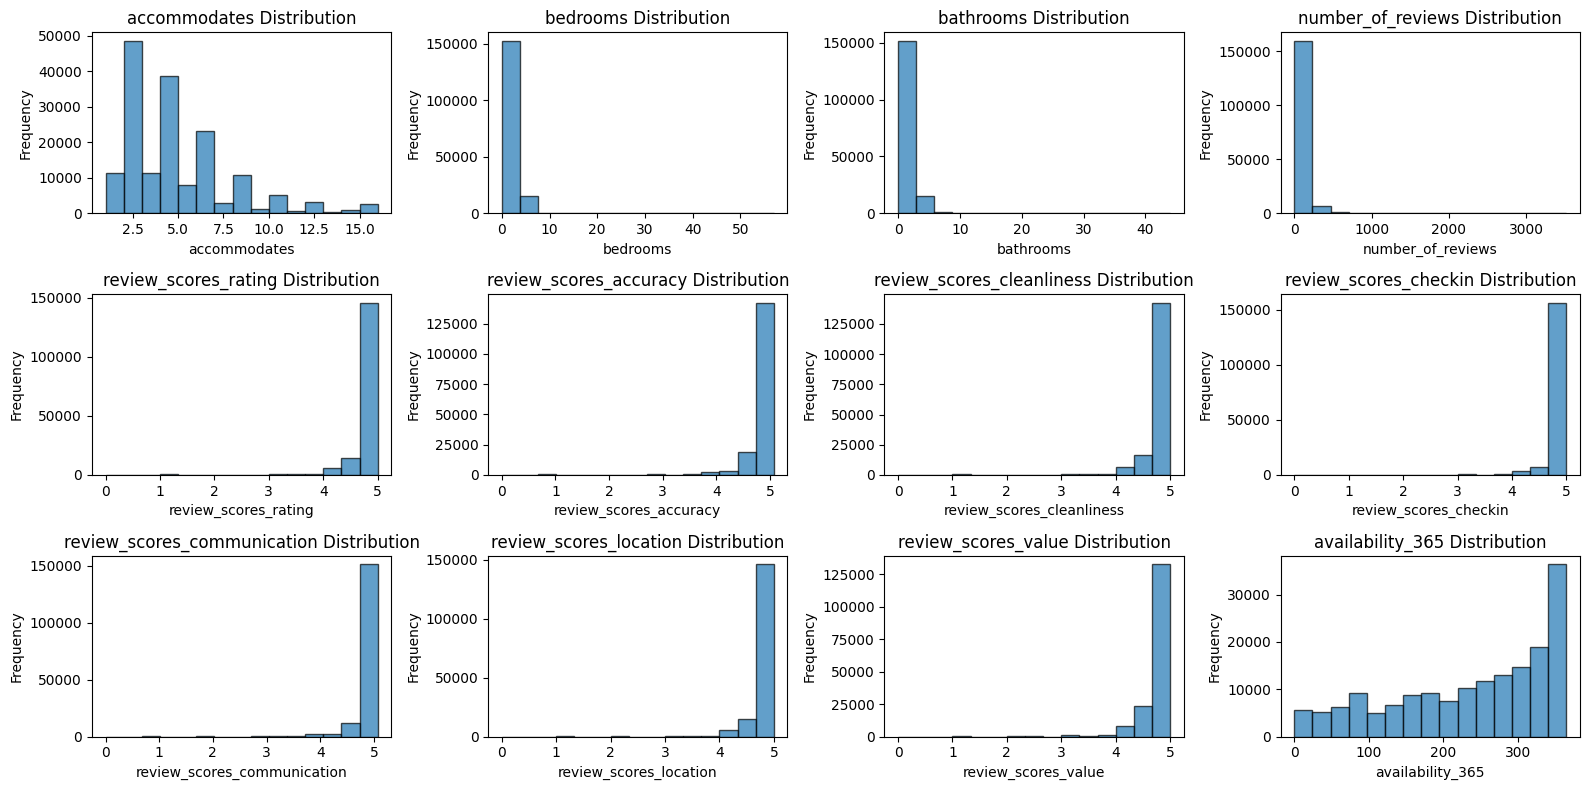

In [ ]:
# NUMERICAL FEATURES ANALYSIS
print("NUMERICAL FEATURES")

numerical_cols = ['accommodates', 'bedrooms', 'bathrooms',
                  'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value',
                  'availability_365']

# Filter to only existing columns
numerical_cols = [col for col in numerical_cols if col in df.columns]

print("\nNumerical Features Statistics:")
print(df[numerical_cols].describe().round(2))

# Distribution plots
fig, axes = plt.subplots(3, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].hist(df[col].dropna(), bins=15, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

RELATIONSHIP VISUALIZATIONS


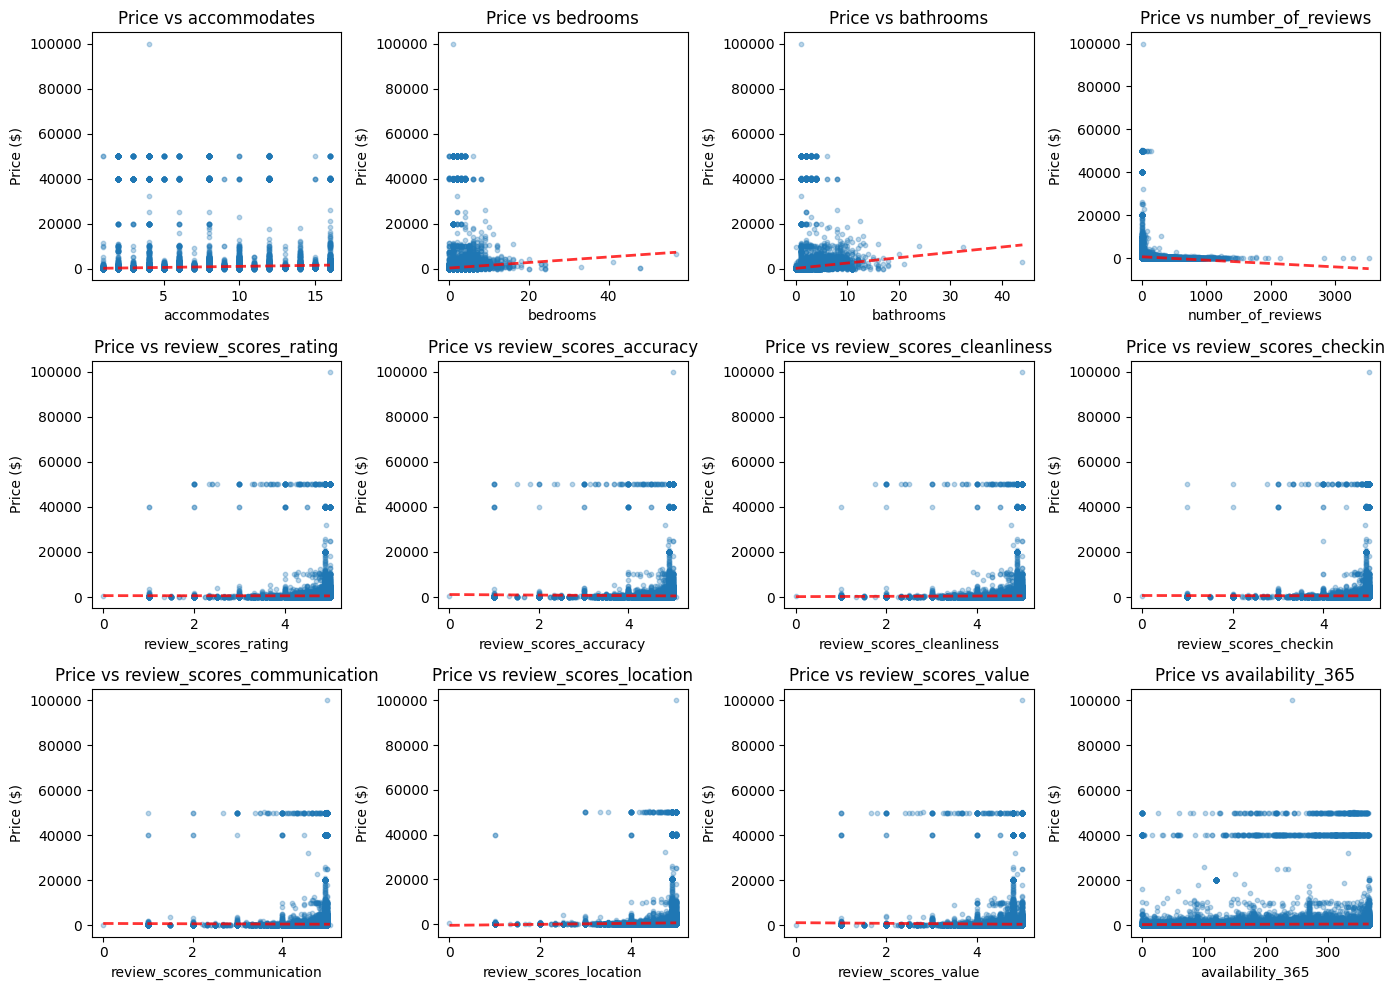

In [ ]:
# SCATTER PLOTS - PRICE VS NUMERICAL FEATURES
print("RELATIONSHIP VISUALIZATIONS")

fig, axes = plt.subplots(3, 4, figsize=(14, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].scatter(df[col], df['price'], alpha=0.3, s=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price ($)')
    axes[i].set_title(f'Price vs {col}')

    # Add trend line
    z = np.polyfit(df[col].dropna(), df.loc[df[col].notna(), 'price'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[col].sort_values(), p(df[col].sort_values()),
                 "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

CORRELATION WITH PRICE
accommodates                   0.088034
bathrooms                      0.075845
bedrooms                       0.051388
availability_365               0.022128
review_scores_location         0.020833
review_scores_cleanliness      0.007436
review_scores_rating          -0.002353
review_scores_checkin         -0.003019
review_scores_communication   -0.006425
review_scores_accuracy        -0.012470
review_scores_value           -0.016320
number_of_reviews             -0.050762
Name: price, dtype: float64


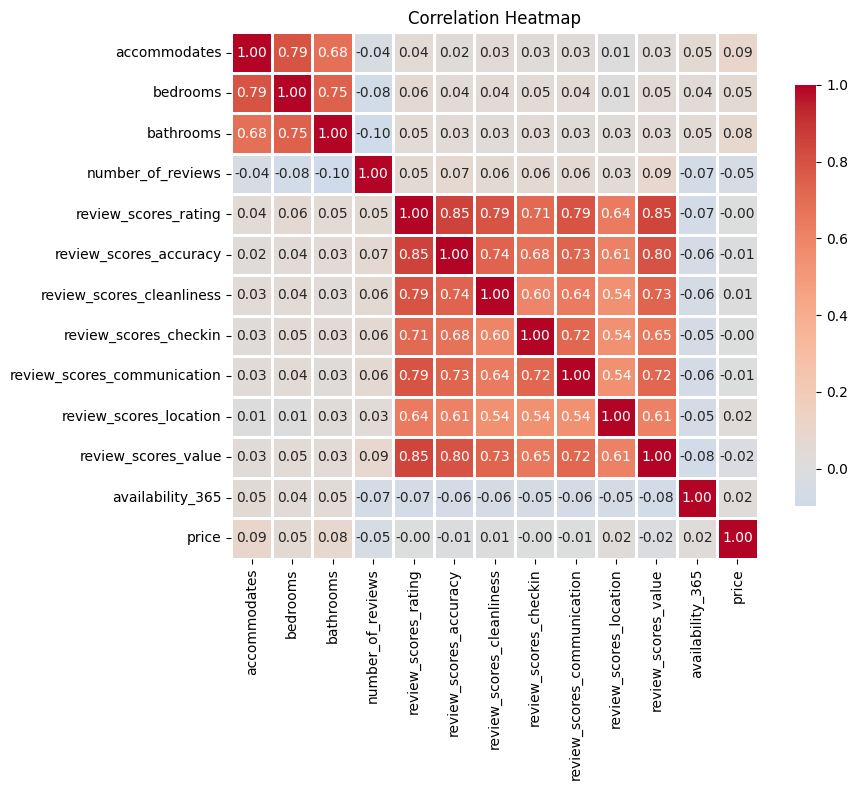

In [ ]:
# CORRELATION ANALYSIS: NUMERICAL FEATURES
print("CORRELATION WITH PRICE")

# Calculate correlations with price
correlations = df[numerical_cols + ['price']].corr()['price'].drop('price').sort_values(ascending=False)
print(correlations)

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols + ['price']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

SUPERHOST ANALYSIS

Superhost Distribution:
host_is_superhost
f    89938
t    78636
Name: count, dtype: int64

Average Price:
host_is_superhost
f    691.78
t    285.71
Name: price, dtype: float64


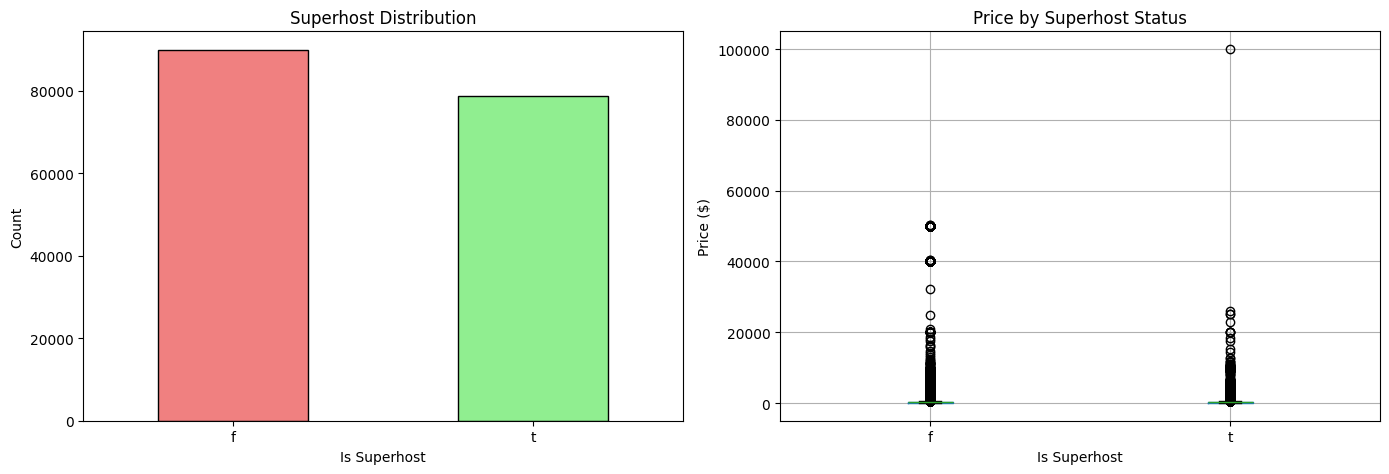

In [ ]:
# HOST ANALYSIS
if 'host_is_superhost' in df.columns:
    print("SUPERHOST ANALYSIS")

    print(f"\nSuperhost Distribution:")
    print(df['host_is_superhost'].value_counts())

    print(f"\nAverage Price:")
    print(df.groupby('host_is_superhost')['price'].mean().round(2))

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Count
    df['host_is_superhost'].value_counts().plot(kind='bar', ax=axes[0],
                                                  color=['lightcoral', 'lightgreen'],
                                                  edgecolor='black')
    axes[0].set_title('Superhost Distribution')
    axes[0].set_xlabel('Is Superhost')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)

    # Price comparison
    df.boxplot(column='price', by='host_is_superhost', ax=axes[1])
    axes[1].set_title('Price by Superhost Status')
    axes[1].set_xlabel('Is Superhost')
    axes[1].set_ylabel('Price ($)')
    plt.suptitle('')

    plt.tight_layout()
    plt.show()

In [ ]:
df['host_is_superhost'] = df['host_is_superhost'].replace({
    't': 1, 'f': 0,
    'True': 1, 'False': 0,
    True: 1, False: 0
})

df['host_is_superhost'] = pd.to_numeric(df['host_is_superhost'], errors='coerce')

/tmp/ipython-input-2143627068.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['host_is_superhost'] = df['host_is_superhost'].replace({


# 3. Machine Learning Models

## OLS Regression

In [ ]:
# OLS on full dataset

# Select predictors
predictors_numeric = [
    'accommodates', 'bedrooms', 'bathrooms', 'beds',
    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value',
    'host_response_rate', 'host_acceptance_rate',
    'availability_365', 'amenities_count',
]

predictors_binary = ['host_is_superhost']

predictor_amenities = [f"amenity_{x}" for x in clean_top_10]

categorical_vars = ['city', 'room_type', 'property_type', 'neigh_filtered']

all_predictors = predictors_numeric + predictors_binary + predictor_amenities + categorical_vars

# Build modeling dataset
ols_df = df[all_predictors + ['price']].copy()

# Fix host_is_superhost inside OLS dataset
ols_df['host_is_superhost'] = (
    ols_df['host_is_superhost']
    .replace({'t':1, 'f':0, 'True':1, 'False':0, True:1, False:0})
    .astype(int)
)

# Remove bad values
ols_df = ols_df.replace([np.inf, -np.inf], np.nan).dropna()

# log(price)
ols_df['log_price'] = np.log1p(ols_df['price'])

# Build formula automatically
formula = "log_price ~ "

# Numeric predictors
for var in predictors_numeric:
    formula += f"{var} + "

# Binary variables
for var in predictors_binary:
    formula += f"{var} + "

# Top 10 amenities
for var in predictor_amenities:
    formula += f"{var} + "

# Categorical variables
for var in categorical_vars:
    formula += f"C({var}) + "

# Remove final "+" sign
formula = formula.rstrip("+ ").strip()

print("=== OLS FULL DATATSET ===")
print(formula)

# Run OLS regression
model = smf.ols(formula=formula, data=ols_df).fit()
print(model.summary())

=== OLS FULL DATATSET ===
log_price ~ accommodates + bedrooms + bathrooms + beds + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + host_response_rate + host_acceptance_rate + availability_365 + amenities_count + host_is_superhost + amenity_Smoke_alarm + amenity_Wifi + amenity_Kitchen + amenity_Hot_water + amenity_Carbon_monoxide_alarm + amenity_Hair_dryer + amenity_Hangers + amenity_Essentials + amenity_Dishes_and_silverware + amenity_Microwave + C(city) + C(room_type) + C(property_type) + C(neigh_filtered)
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1162.
Date:                S

In [ ]:
# Build X and y BEFORE dummy encoding
X = ols_df[all_predictors].copy()
y = ols_df['log_price']

# Drop rows with NaNs
mask = ~X.isna().any(axis=1)
X = X[mask]
y = y[mask]

# Dummy encode categorical features
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

# Convert all to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop NaNs AFTER encoding
mask2 = ~X.isna().any(axis=1)
X = X[mask2]
y = y[mask2]

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Add constant
X_train_const = sm.add_constant(X_train)
X_test_const  = sm.add_constant(X_test)

# Convert all boolean columns to integers (0/1)
bool_cols = X_train_const.select_dtypes(include=['bool']).columns
X_train_const[bool_cols] = X_train_const[bool_cols].astype(int)
X_test_const[bool_cols]  = X_test_const[bool_cols].astype(int)

# Fit OLS on training data
ols_pred_model = sm.OLS(y_train, X_train_const).fit()

# Predict on test data
y_pred = ols_pred_model.predict(X_test_const)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("OLS Predictive Performance (Test Set)")
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)

OLS Predictive Performance (Test Set)
RMSE: 0.5672323548176549
MAE : 0.3896205082852302
R²  : 0.6108237789435433


In [ ]:
# Extract coefficients (ignore the intercept)
ols_coefs = model.params.drop('Intercept')

# Build a DataFrame
coef_df = pd.DataFrame({
    'feature': ols_coefs.index,
    'coefficient': ols_coefs.values,
})

top_positive = coef_df.sort_values('coefficient', ascending=False).head(10)
top_negative = coef_df.sort_values('coefficient', ascending=True).head(10)

print("\nTop OLS Positive Predictors")
print(top_positive)

print("\nTop OLS Negative Predictors")
print(top_negative)


Top OLS Positive Predictors
                                               feature  coefficient
15                          C(room_type)[T.Hotel room]     2.451364
117  C(property_type)[T.Shared room in serviced apa...     1.838033
103        C(property_type)[T.Shared room in bungalow]     1.206656
0                                C(city)[T.boston.csv]     0.653136
108     C(property_type)[T.Shared room in guest suite]     0.644740
6                                C(city)[T.hawaii.csv]     0.621042
41       C(property_type)[T.Entire serviced apartment]     0.583354
10                                  C(city)[T.nyc.csv]     0.574991
24                            C(property_type)[T.Cave]     0.561355
118       C(property_type)[T.Shared room in townhouse]     0.539480

Top OLS Negative Predictors
                                            feature  coefficient
96               C(property_type)[T.Room in hostel]    -3.431642
94    C(property_type)[T.Room in bed and breakfast]    -2.559947

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Prepare X and y
X = ols_df[all_predictors].copy()
y = ols_df['log_price']

# Drop NaN rows before dummy encoding
mask = ~X.isna().any(axis=1)
X = X[mask]
y = y[mask]

# Dummy encode categoricals
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

# Convert all to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop NaN after dummy encoding
mask2 = ~X.isna().any(axis=1)
X = X[mask2]
y = y[mask2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Build Ridge model (with scaling)
ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

# Fit model
ridge_model.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
# Evaluate Ridge
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae  = mean_absolute_error(y_test, y_pred_ridge)
r2   = r2_score(y_test, y_pred_ridge)

print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)

# Extract coefficients
ridge_coef = ridge_model.named_steps['ridge'].coef_
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': ridge_coef
}).sort_values(by='coefficient', ascending=False)

print("\nTop Ridge Positive Coefficients:")
print(coef_df.head(10))

print("\nTop Ridge Negative Coefficients:")
print(coef_df.tail(10))

RMSE: 0.5672501603611787
MAE : 0.3896455175635011
R²  : 0.6107993459123781

Top Ridge Positive Coefficients:
                   feature  coefficient
33         city_hawaii.csv     0.241318
0             accommodates     0.221211
42    room_type_Hotel room     0.212870
37            city_nyc.csv     0.188550
2                bathrooms     0.165171
34    city_los angeles.csv     0.121008
1                 bedrooms     0.116971
43  room_type_Private room     0.112846
15         amenities_count     0.106734
27         city_boston.csv     0.094635

Top Ridge Negative Coefficients:
                                       feature  coefficient
190                    neigh_filtered_Hennepin    -0.073674
11                         review_scores_value    -0.080778
20                           amenity_Hot_water    -0.083366
25               amenity_Dishes_and_silverware    -0.084665
209                  neigh_filtered_North Kona    -0.085377
113    property_type_Private room in townhouse    -0.0930

CROSS-VALIDATION: OPTIMAL ALPHA SELECTION
Best Ridge α from CV: 10.0


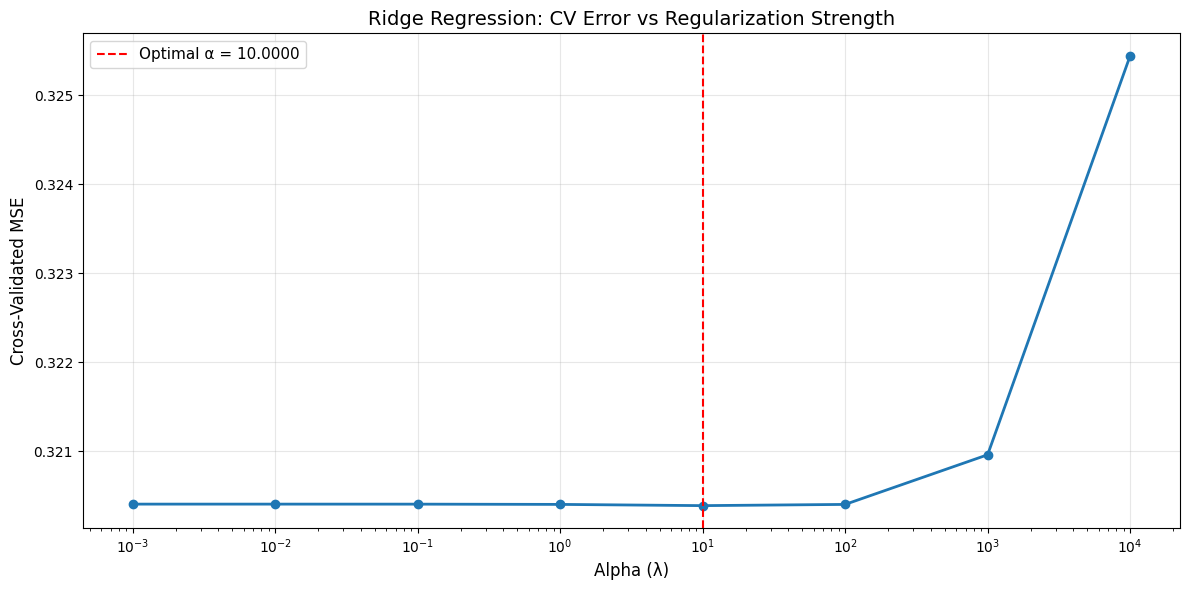

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV

# CROSS-VALIDATION PERFORMANCE: MSE vs α
print("CROSS-VALIDATION: OPTIMAL ALPHA SELECTION")

# Test range of alpha values
alphas = np.logspace(-3, 4, 8)  # From 0.001 to 10000
cv_scores = []

# Manual CV loop
for alpha in alphas:
    ridge = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])

    scores = cross_val_score(
        ridge, X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error'
    )

    cv_scores.append(-scores.mean())   # convert to positive MSE

optimal_alpha = alphas[np.argmin(cv_scores)]
print("Best Ridge α from CV:", optimal_alpha)

ridge_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=optimal_alpha))
])

ridge_cv.fit(X_train, y_train)

# Plot CV Curve
plt.figure(figsize=(12, 6))
plt.semilogx(alphas, cv_scores, marker='o', linewidth=2)
plt.axvline(optimal_alpha, color='r', linestyle='--',
            label=f"Optimal α = {optimal_alpha:.4f}")
plt.xlabel('Alpha (λ)', fontsize=12)
plt.ylabel('Cross-Validated MSE', fontsize=12)
plt.title('Ridge Regression: CV Error vs Regularization Strength', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

In [ ]:
# USE OPTIMAL ALPHA FOR FINAL MODEL
print("RIDGE MODEL WITH OPTIMAL ALPHA")

# Retrain with optimal alpha
ridge_optimal = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=optimal_alpha))
])
ridge_optimal.fit(X_train, y_train)

# Predictions
y_train_pred = ridge_optimal.predict(X_train)
y_test_pred = ridge_optimal.predict(X_test)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nOptimal Ridge Performance:")
print(f"Training RMSE: {train_rmse:.6f}")
print(f"Test RMSE:     {test_rmse:.6f}")
print(f"Training R²:   {train_r2:.6f}")
print(f"Test R²:       {test_r2:.6f}")

RIDGE MODEL WITH OPTIMAL ALPHA

Optimal Ridge Performance:
Training RMSE: 0.564273
Test RMSE:     0.567237
Training R²:   0.617191
Test R²:       0.610817


COEFFICIENT PATH ANALYSIS


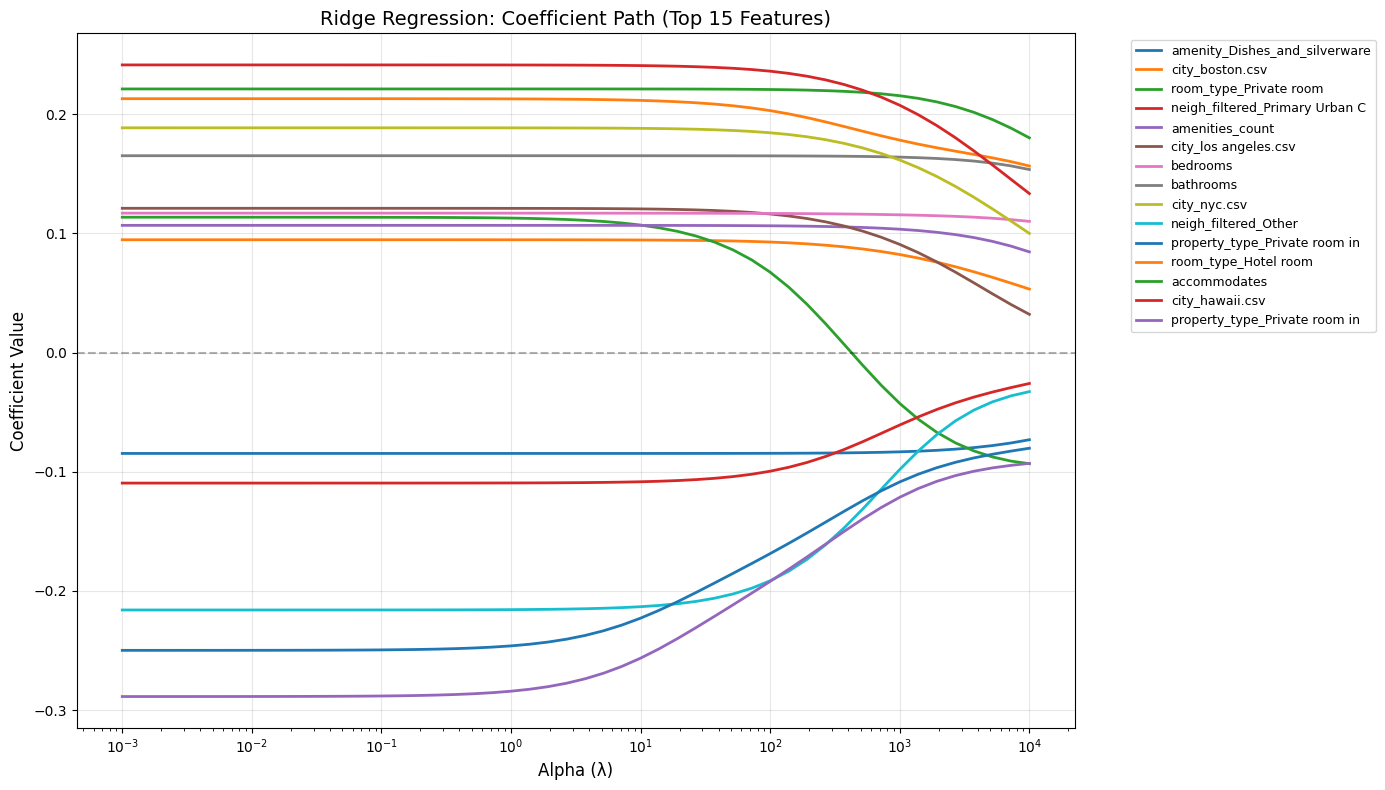

In [ ]:
# COEFFICIENT PATH PLOT
print("COEFFICIENT PATH ANALYSIS")

# Test range of alphas
alphas_path = np.logspace(-3, 4, 50)
coefs = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

for alpha in alphas_path:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

# Plot coefficient paths for top features
plt.figure(figsize=(14, 8))

# Select top 15 most important features (by average absolute coefficient)
avg_coef = np.mean(np.abs(coefs), axis=0)
top_indices = np.argsort(avg_coef)[-15:]

for idx in top_indices:
    plt.plot(alphas_path, coefs[:, idx], linewidth=2,
             label=X_train.columns[idx][:30])  # Truncate long names

plt.xscale('log')
plt.xlabel('Alpha (λ)', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.title('Ridge Regression: Coefficient Path (Top 15 Features)', fontsize=14)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

PREDICTED VS ACTUAL PLOT


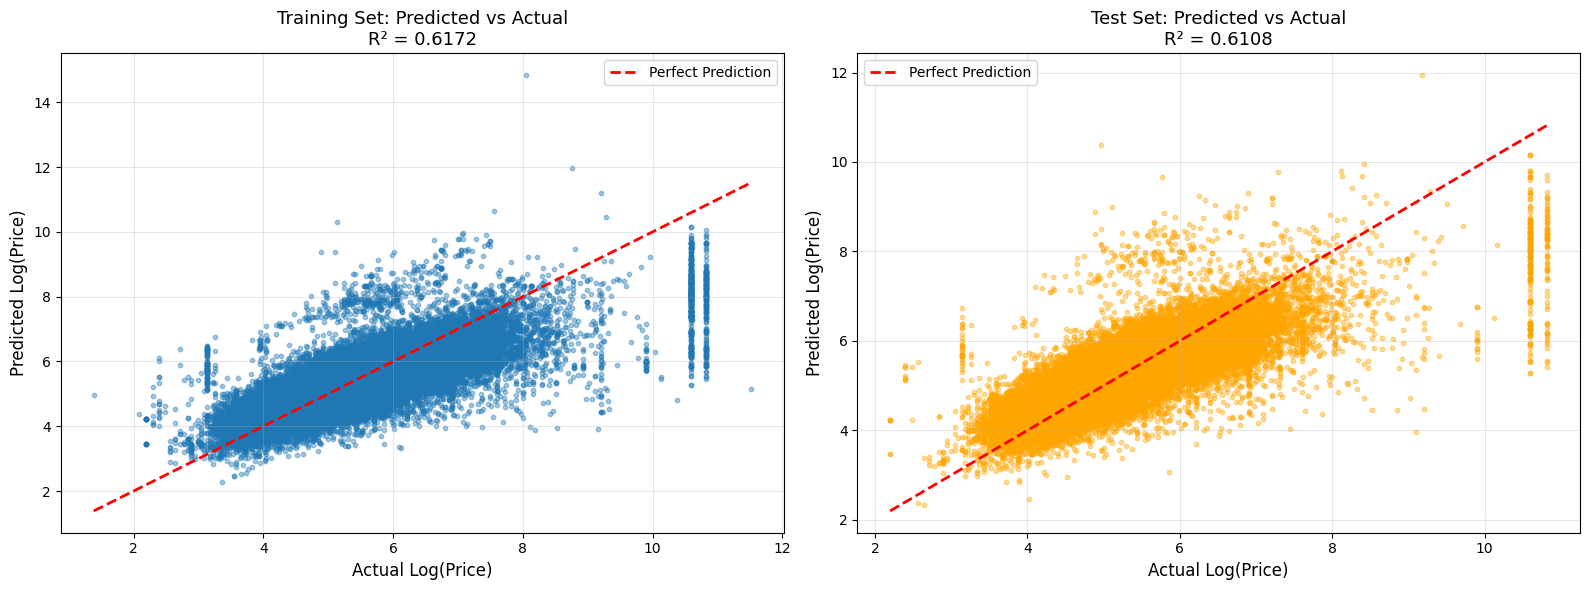

In [ ]:
# PREDICTED VS ACTUAL PLOT
print("PREDICTED VS ACTUAL PLOT")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.4, s=10)
axes[0].plot([y_train.min(), y_train.max()],
             [y_train.min(), y_train.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Log(Price)', fontsize=12)
axes[0].set_ylabel('Predicted Log(Price)', fontsize=12)
axes[0].set_title(f'Training Set: Predicted vs Actual\nR² = {train_r2:.4f}', fontsize=13)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.4, s=10, color='orange')
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Log(Price)', fontsize=12)
axes[1].set_ylabel('Predicted Log(Price)', fontsize=12)
axes[1].set_title(f'Test Set: Predicted vs Actual\nR² = {test_r2:.4f}', fontsize=13)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

6. RESIDUAL ANALYSIS


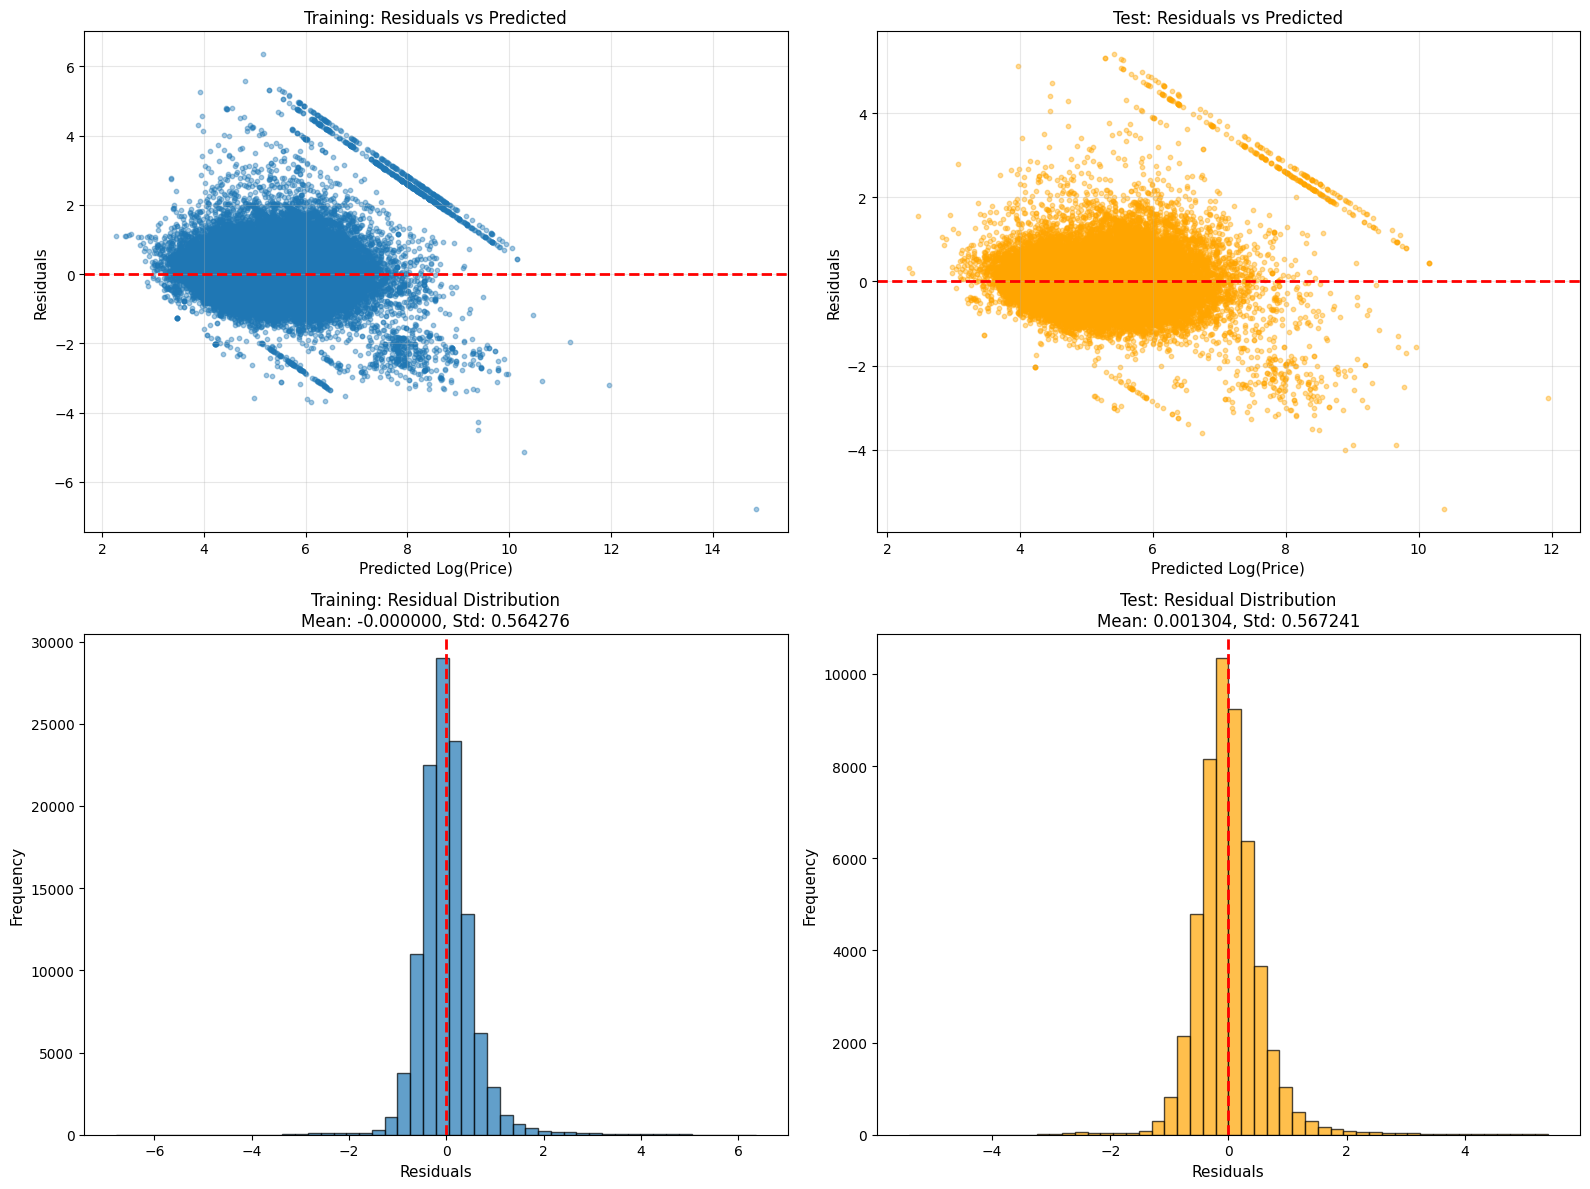


Residual Statistics:
Training - Mean: -0.000000, Std: 0.564276
Test     - Mean: 0.001304, Std: 0.567241

Heteroscedasticity Check (Spearman correlation of |residuals| with predictions):
Training: r=0.1514, p=0.0000
Test:     r=0.1568, p=0.0000
⚠️ Significant heteroscedasticity detected (p < 0.05)


In [ ]:
# RESIDUAL PLOT
print("6. RESIDUAL ANALYSIS")

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Residuals vs Predicted (Training)
axes[0, 0].scatter(y_train_pred, train_residuals, alpha=0.4, s=10)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Log(Price)', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Training: Residuals vs Predicted', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals vs Predicted (Test)
axes[0, 1].scatter(y_test_pred, test_residuals, alpha=0.4, s=10, color='orange')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Log(Price)', fontsize=11)
axes[0, 1].set_ylabel('Residuals', fontsize=11)
axes[0, 1].set_title('Test: Residuals vs Predicted', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residual Distribution (Training)
axes[1, 0].hist(train_residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title(f'Training: Residual Distribution\nMean: {train_residuals.mean():.6f}, Std: {train_residuals.std():.6f}',
                     fontsize=12)

# Plot 4: Residual Distribution (Test)
axes[1, 1].hist(test_residuals, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title(f'Test: Residual Distribution\nMean: {test_residuals.mean():.6f}, Std: {test_residuals.std():.6f}',
                     fontsize=12)

plt.tight_layout()
plt.show()

# Residual statistics
print("\nResidual Statistics:")
print(f"Training - Mean: {train_residuals.mean():.6f}, Std: {train_residuals.std():.6f}")
print(f"Test     - Mean: {test_residuals.mean():.6f}, Std: {test_residuals.std():.6f}")

# Check for heteroscedasticity
from scipy.stats import spearmanr
corr_train, p_train = spearmanr(np.abs(train_residuals), y_train_pred)
corr_test, p_test = spearmanr(np.abs(test_residuals), y_test_pred)
print(f"\nHeteroscedasticity Check (Spearman correlation of |residuals| with predictions):")
print(f"Training: r={corr_train:.4f}, p={p_train:.4f}")
print(f"Test:     r={corr_test:.4f}, p={p_test:.4f}")
if p_test < 0.05:
    print("⚠️ Significant heteroscedasticity detected (p < 0.05)")
else:
    print("✓ No significant heteroscedasticity")

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

# Prepare X and y
X = ols_df[all_predictors].copy()
y = ols_df['log_price']

# Drop NaN rows before dummy encoding
mask = ~X.isna().any(axis=1)
X = X[mask]
y = y[mask]

# Dummy encode categoricals
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

# Convert to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop remaining NaNs
mask2 = ~X.isna().any(axis=1)
X = X[mask2]
y = y[mask2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Cross-validated Lasso to choose best alpha
alphas = np.logspace(-3, 4, 8)

lasso_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=5000))
])

lasso_cv.fit(X_train, y_train)

best_alpha = lasso_cv.named_steps['lasso'].alpha_
print("Best alpha (λ) from CV:", best_alpha)

# Fit final Lasso model using best alpha
lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=best_alpha, max_iter=5000))
])

lasso_model.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso_model.predict(X_test)

Best alpha (λ) from CV: 0.001


In [ ]:
# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae  = mean_absolute_error(y_test, y_pred_lasso)
r2   = r2_score(y_test, y_pred_lasso)

print("\n=== Lasso Predictive Performance ===")
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)

# Extract coefficients
lasso_coef = lasso_model.named_steps['lasso'].coef_
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lasso_coef
}).sort_values(by='coefficient', ascending=False)

print("\nTop Lasso Positive Coefficients:")
print(coef_df.head(10))

print("\nTop Lasso Negative Coefficients:")
print(coef_df.tail(10))


=== Lasso Predictive Performance ===
RMSE: 0.5678771665490888
MAE : 0.39019159058502695
R²  : 0.6099384696900165

Top Lasso Positive Coefficients:
                                    feature  coefficient
0                              accommodates     0.220134
33                          city_hawaii.csv     0.207534
42                     room_type_Hotel room     0.175822
2                                 bathrooms     0.164376
37                             city_nyc.csv     0.161291
1                                  bedrooms     0.112645
15                          amenities_count     0.102683
34                     city_los angeles.csv     0.089630
27                          city_boston.csv     0.080892
68  property_type_Entire serviced apartment     0.073479

Top Lasso Negative Coefficients:
                                       feature  coefficient
216        neigh_filtered_Primary Urban Center    -0.040202
3                                         beds    -0.043820
213        

CROSS-VALIDATION: OPTIMAL ALPHA SELECTION

Optimal Alpha (manual CV): 0.001000
Optimal Alpha (LassoCV):   0.001000
Cross-Validated MSE at optimal alpha: 0.321236
Cross-Validated RMSE at optimal alpha: 0.566777


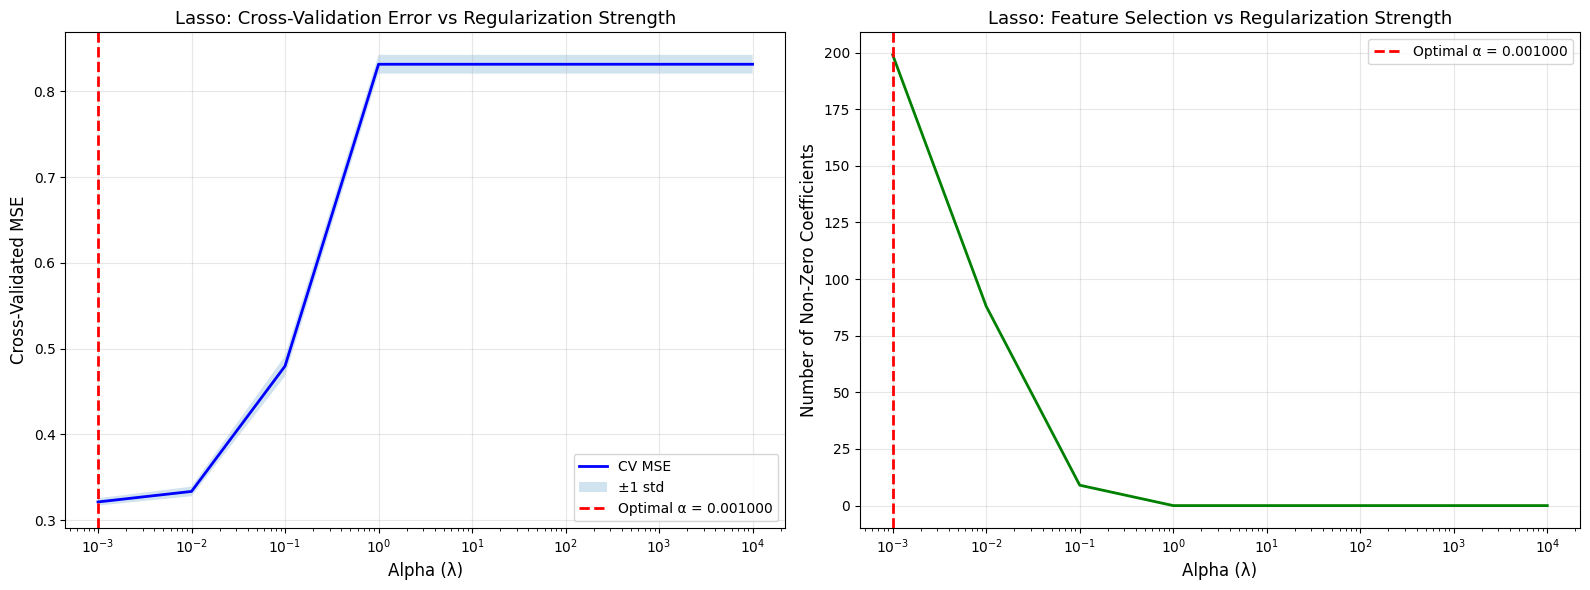


At optimal α = 0.001000:
  - Selected features: 199
  - Eliminated features: 34


In [ ]:
# CROSS-VALIDATION PERFORMANCE: MSE vs α
print("CROSS-VALIDATION: OPTIMAL ALPHA SELECTION")

# Test range of alpha values
alphas = np.logspace(-3, 4, 8)  # From 0.0001 to 10
cv_scores = []
cv_std = []

for alpha in alphas:
    lasso = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=alpha, max_iter=5000))
    ])
    # 5-fold cross-validation
    scores = cross_val_score(lasso, X_train, y_train,
                            cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())
    cv_std.append(scores.std())

cv_scores = np.array(cv_scores)
cv_std = np.array(cv_std)

# Find optimal alpha
optimal_idx = np.argmin(cv_scores)
optimal_alpha_manual = alphas[optimal_idx]
optimal_mse = cv_scores[optimal_idx]

print(f"\nOptimal Alpha (manual CV): {optimal_alpha_manual:.6f}")
print(f"Optimal Alpha (LassoCV):   {best_alpha:.6f}")
print(f"Cross-Validated MSE at optimal alpha: {optimal_mse:.6f}")
print(f"Cross-Validated RMSE at optimal alpha: {np.sqrt(optimal_mse):.6f}")

# Plot CV MSE vs Alpha
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: MSE vs Alpha with error bands
axes[0].semilogx(alphas, cv_scores, 'b-', linewidth=2, label='CV MSE')
axes[0].fill_between(alphas, cv_scores - cv_std, cv_scores + cv_std,
                     alpha=0.2, label='±1 std')
axes[0].axvline(best_alpha, color='r', linestyle='--', linewidth=2,
               label=f'Optimal α = {best_alpha:.6f}')
axes[0].set_xlabel('Alpha (λ)', fontsize=12)
axes[0].set_ylabel('Cross-Validated MSE', fontsize=12)
axes[0].set_title('Lasso: Cross-Validation Error vs Regularization Strength', fontsize=13)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10)

# Plot 2: Number of non-zero coefficients vs Alpha
n_nonzero = []
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

for alpha in alphas:
    lasso_temp = Lasso(alpha=alpha, max_iter=5000)
    lasso_temp.fit(X_train_scaled, y_train)
    n_nonzero.append(np.sum(np.abs(lasso_temp.coef_) > 1e-10))

axes[1].semilogx(alphas, n_nonzero, 'g-', linewidth=2)
axes[1].axvline(best_alpha, color='r', linestyle='--', linewidth=2,
               label=f'Optimal α = {best_alpha:.6f}')
axes[1].set_xlabel('Alpha (λ)', fontsize=12)
axes[1].set_ylabel('Number of Non-Zero Coefficients', fontsize=12)
axes[1].set_title('Lasso: Feature Selection vs Regularization Strength', fontsize=13)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nAt optimal α = {best_alpha:.6f}:")
print(f"  - Selected features: {n_nonzero[optimal_idx]}")
print(f"  - Eliminated features: {len(X_train.columns) - n_nonzero[optimal_idx]}")

COEFFICIENT PATH ANALYSIS


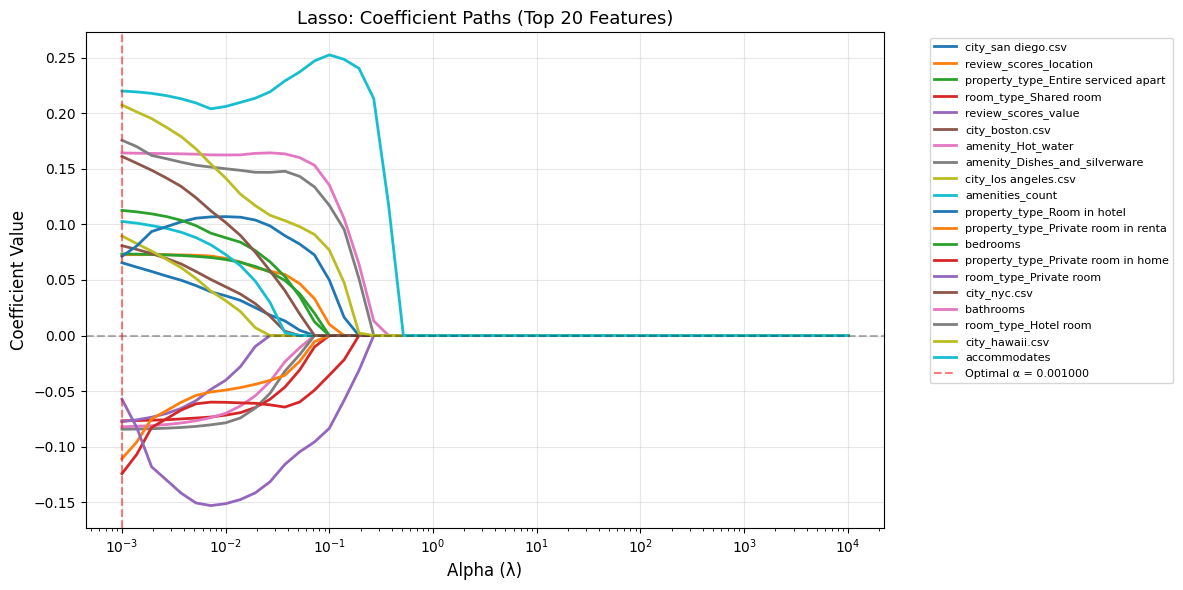


Coefficient Path Interpretation:
- As α increases, coefficients are set to exactly zero (sparse solution)
- Features that survive longer (higher α) are more important
- At optimal α, 199 features are selected


In [ ]:
# COEFFICIENT PATH PLOT
print("COEFFICIENT PATH ANALYSIS")

# Test range of alphas for path
alphas_path = np.logspace(-3, 4, 50)
coefs_path = []

for alpha in alphas_path:
    lasso_temp = Lasso(alpha=alpha, max_iter=5000)
    lasso_temp.fit(X_train_scaled, y_train)
    coefs_path.append(lasso_temp.coef_)

coefs_path = np.array(coefs_path)

# Count features surviving at each alpha
n_nonzero_path = [np.sum(np.abs(c) > 1e-10) for c in coefs_path]

# Plot Coefficient paths for top features
# Select top 20 most important features (by max absolute coefficient across path)
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
axes = [axes]

max_coef = np.max(np.abs(coefs_path), axis=0)
top_indices = np.argsort(max_coef)[-20:]

for idx in top_indices:
    axes[0].plot(alphas_path, coefs_path[:, idx], linewidth=2,
                label=X_train.columns[idx][:35])

axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha (λ)', fontsize=12)
axes[0].set_ylabel('Coefficient Value', fontsize=12)
axes[0].set_title('Lasso: Coefficient Paths (Top 20 Features)', fontsize=13)
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0].axvline(x=best_alpha, color='r', linestyle='--', alpha=0.5,
               label=f'Optimal α = {best_alpha:.6f}')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nCoefficient Path Interpretation:")
print("- As α increases, coefficients are set to exactly zero (sparse solution)")
print("- Features that survive longer (higher α) are more important")
print(f"- At optimal α, {n_nonzero[optimal_idx]} features are selected")

PREDICTED VS ACTUAL ANALYSIS

Lasso Performance (α = 0.001000):
Training RMSE: 0.565175  |  Test RMSE: 0.567877
Training MAE:  0.389032  |  Test MAE:  0.390192
Training R²:   0.615966  |  Test R²:   0.609938


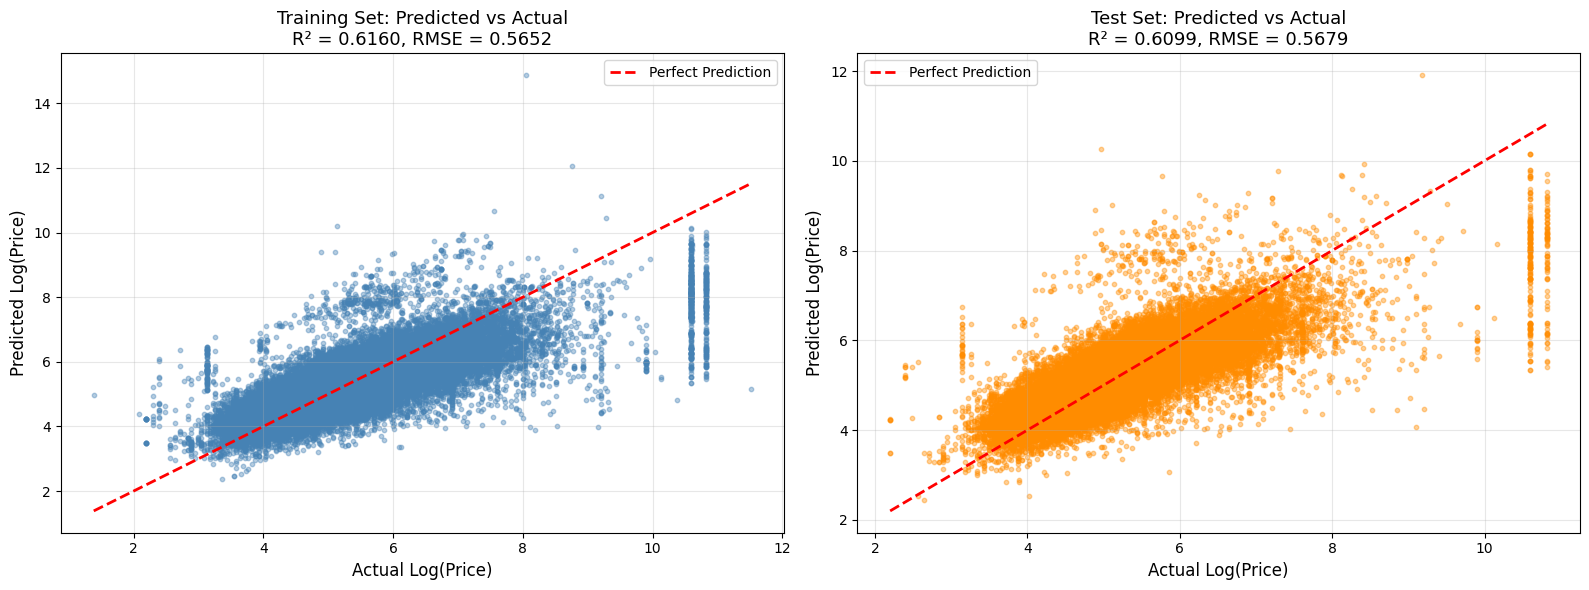

In [ ]:
# PREDICTED VS ACTUAL PLOT
print("PREDICTED VS ACTUAL ANALYSIS")

# Get predictions
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nLasso Performance (α = {best_alpha:.6f}):")
print(f"Training RMSE: {train_rmse:.6f}  |  Test RMSE: {test_rmse:.6f}")
print(f"Training MAE:  {train_mae:.6f}  |  Test MAE:  {test_mae:.6f}")
print(f"Training R²:   {train_r2:.6f}  |  Test R²:   {test_r2:.6f}")

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.4, s=10, color='steelblue')
axes[0].plot([y_train.min(), y_train.max()],
            [y_train.min(), y_train.max()],
            'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Log(Price)', fontsize=12)
axes[0].set_ylabel('Predicted Log(Price)', fontsize=12)
axes[0].set_title(f'Training Set: Predicted vs Actual\nR² = {train_r2:.4f}, RMSE = {train_rmse:.4f}',
                 fontsize=13)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.4, s=10, color='darkorange')
axes[1].plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Log(Price)', fontsize=12)
axes[1].set_ylabel('Predicted Log(Price)', fontsize=12)
axes[1].set_title(f'Test Set: Predicted vs Actual\nR² = {test_r2:.4f}, RMSE = {test_rmse:.4f}',
                 fontsize=13)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

RESIDUAL ANALYSIS


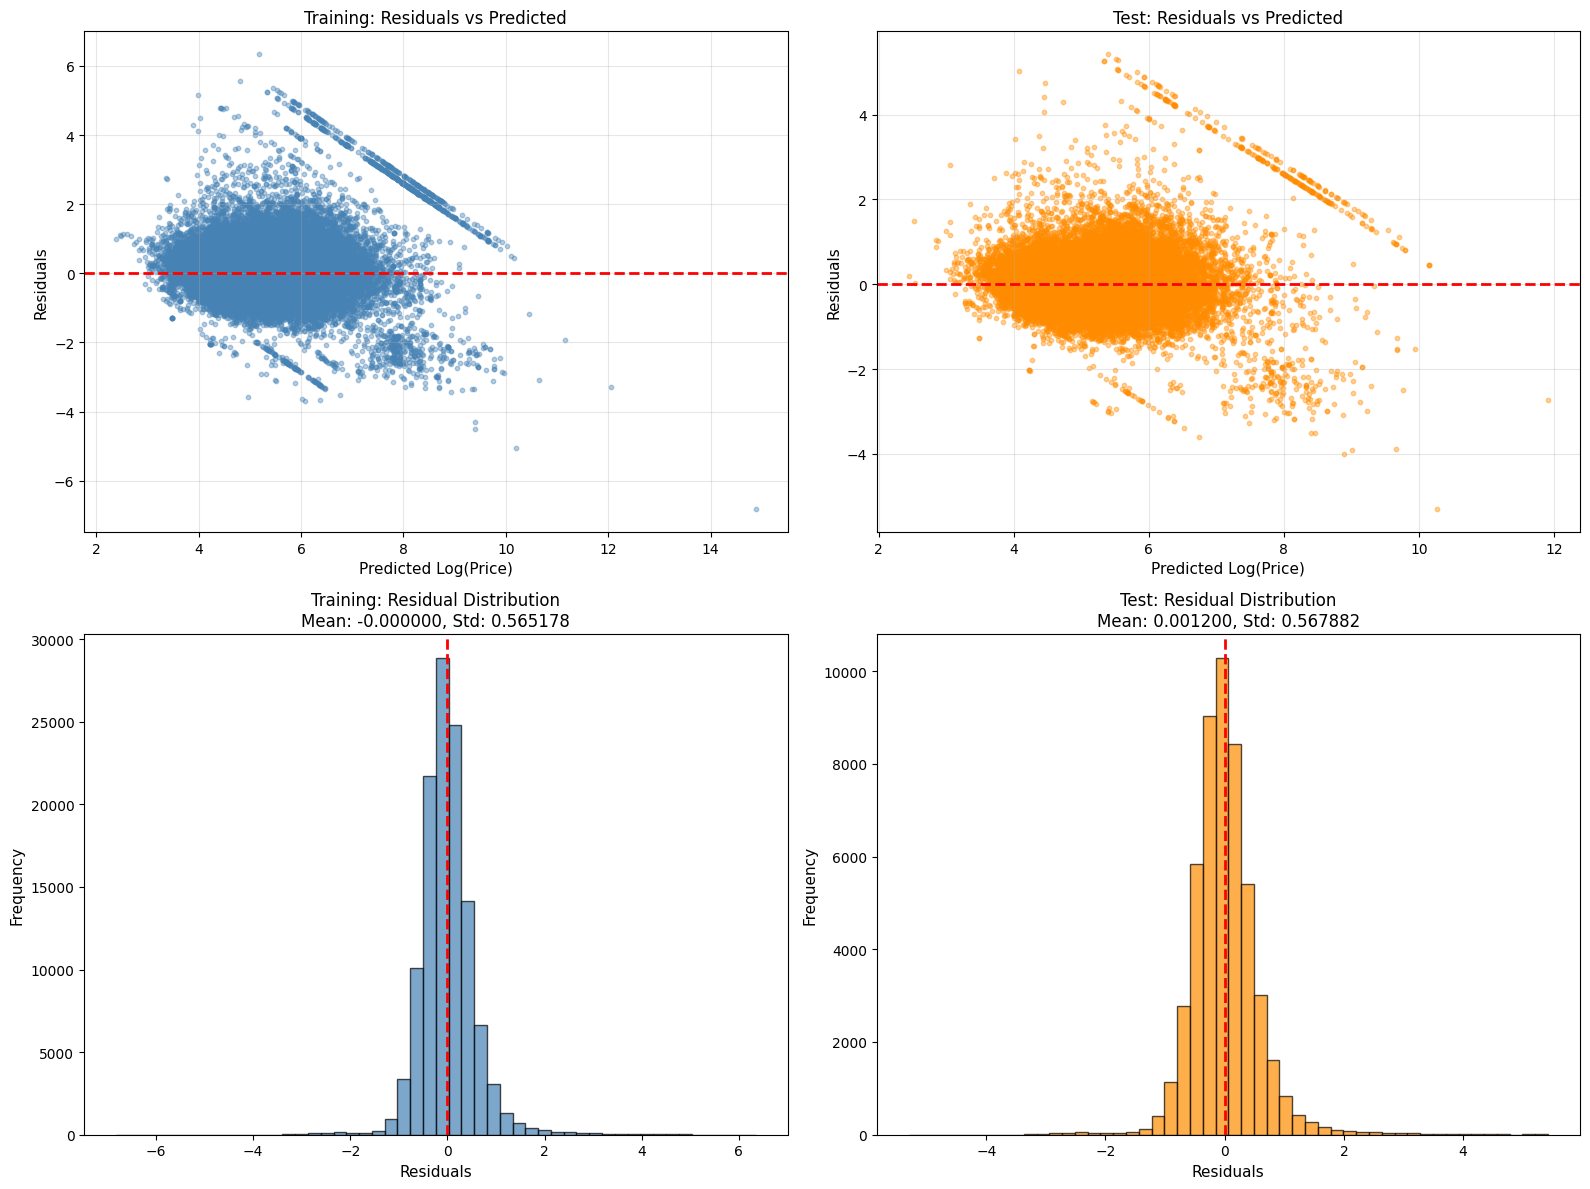


Residual Statistics:
Training - Mean: -0.000000, Std: 0.565178
Test     - Mean: 0.001200, Std: 0.567882

Heteroscedasticity Check (Spearman correlation):
Training: r=0.1495, p=0.0000
Test:     r=0.1563, p=0.0000
⚠️ Significant heteroscedasticity detected (p < 0.05)


In [ ]:
# RESIDUAL ANALYSIS
print("RESIDUAL ANALYSIS")

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Residuals vs Predicted (Training)
axes[0, 0].scatter(y_train_pred, train_residuals, alpha=0.4, s=10, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Log(Price)', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Training: Residuals vs Predicted', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals vs Predicted (Test)
axes[0, 1].scatter(y_test_pred, test_residuals, alpha=0.4, s=10, color='darkorange')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Log(Price)', fontsize=11)
axes[0, 1].set_ylabel('Residuals', fontsize=11)
axes[0, 1].set_title('Test: Residuals vs Predicted', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residual Distribution (Training)
axes[1, 0].hist(train_residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title(f'Training: Residual Distribution\nMean: {train_residuals.mean():.6f}, Std: {train_residuals.std():.6f}',
                    fontsize=12)

# Plot 4: Residual Distribution (Test)
axes[1, 1].hist(test_residuals, bins=50, edgecolor='black', alpha=0.7, color='darkorange')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title(f'Test: Residual Distribution\nMean: {test_residuals.mean():.6f}, Std: {test_residuals.std():.6f}',
                    fontsize=12)

plt.tight_layout()
plt.show()

# Residual statistics
print("\nResidual Statistics:")
print(f"Training - Mean: {train_residuals.mean():.6f}, Std: {train_residuals.std():.6f}")
print(f"Test     - Mean: {test_residuals.mean():.6f}, Std: {test_residuals.std():.6f}")

# Check for heteroscedasticity
from scipy.stats import spearmanr
corr_train, p_train = spearmanr(np.abs(train_residuals), y_train_pred)
corr_test, p_test = spearmanr(np.abs(test_residuals), y_test_pred)
print(f"\nHeteroscedasticity Check (Spearman correlation):")
print(f"Training: r={corr_train:.4f}, p={p_train:.4f}")
print(f"Test:     r={corr_test:.4f}, p={p_test:.4f}")
if p_test < 0.05:
    print("⚠️ Significant heteroscedasticity detected (p < 0.05)")
else:
    print("✓ No significant heteroscedasticity")

## Coefficient Shrinkage Patterns

In [ ]:
# REGULARIZATION BEHAVIOR: COEFFICIENT SHRINKAGE & FEATURE SELECTION
print("COEFFICIENT ANALYSIS: SHRINKAGE & SPARSITY")

# Fit OLS for comparison
ols_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ols', LinearRegression())
])
ols_model.fit(X_train, y_train)
ols_coef = ols_model.named_steps['ols'].coef_

# Create comparison dataframe
coef_comparison = pd.DataFrame({
    'feature': X_train.columns,
    'OLS': ols_coef,
    'Ridge': ridge_coef,
    'Lasso': lasso_coef
})

# Calculate shrinkage percentages
coef_comparison['Ridge_shrinkage_%'] = (
    (np.abs(ols_coef) - np.abs(ridge_coef)) / (np.abs(ols_coef) + 1e-10) * 100
)
coef_comparison['Lasso_shrinkage_%'] = (
    (np.abs(ols_coef) - np.abs(lasso_coef)) / (np.abs(ols_coef) + 1e-10) * 100
)

# Sort by absolute OLS coefficient
coef_comparison['abs_OLS'] = np.abs(coef_comparison['OLS'])
coef_comparison = coef_comparison.sort_values('abs_OLS', ascending=False)

print("\nTop 20 Features - Coefficient Comparison:")
print(coef_comparison.head(20)[['feature', 'OLS', 'Ridge', 'Lasso']])

COEFFICIENT ANALYSIS: SHRINKAGE & SPARSITY

Top 20 Features - Coefficient Comparison:
                                       feature       OLS     Ridge     Lasso
97          property_type_Private room in home -0.288684 -0.284206 -0.124393
107  property_type_Private room in rental unit -0.249920 -0.246164 -0.110869
33                             city_hawaii.csv  0.241376  0.241318  0.207534
0                                 accommodates  0.221214  0.221211  0.220134
213                       neigh_filtered_Other -0.216031 -0.215752 -0.045335
42                        room_type_Hotel room  0.213027  0.212870  0.175822
37                                city_nyc.csv  0.188596  0.188550  0.161291
2                                    bathrooms  0.165173  0.165171  0.164376
34                        city_los angeles.csv  0.121060  0.121008  0.089630
1                                     bedrooms  0.116975  0.116971  0.112645
43                      room_type_Private room  0.113576  0.112846 

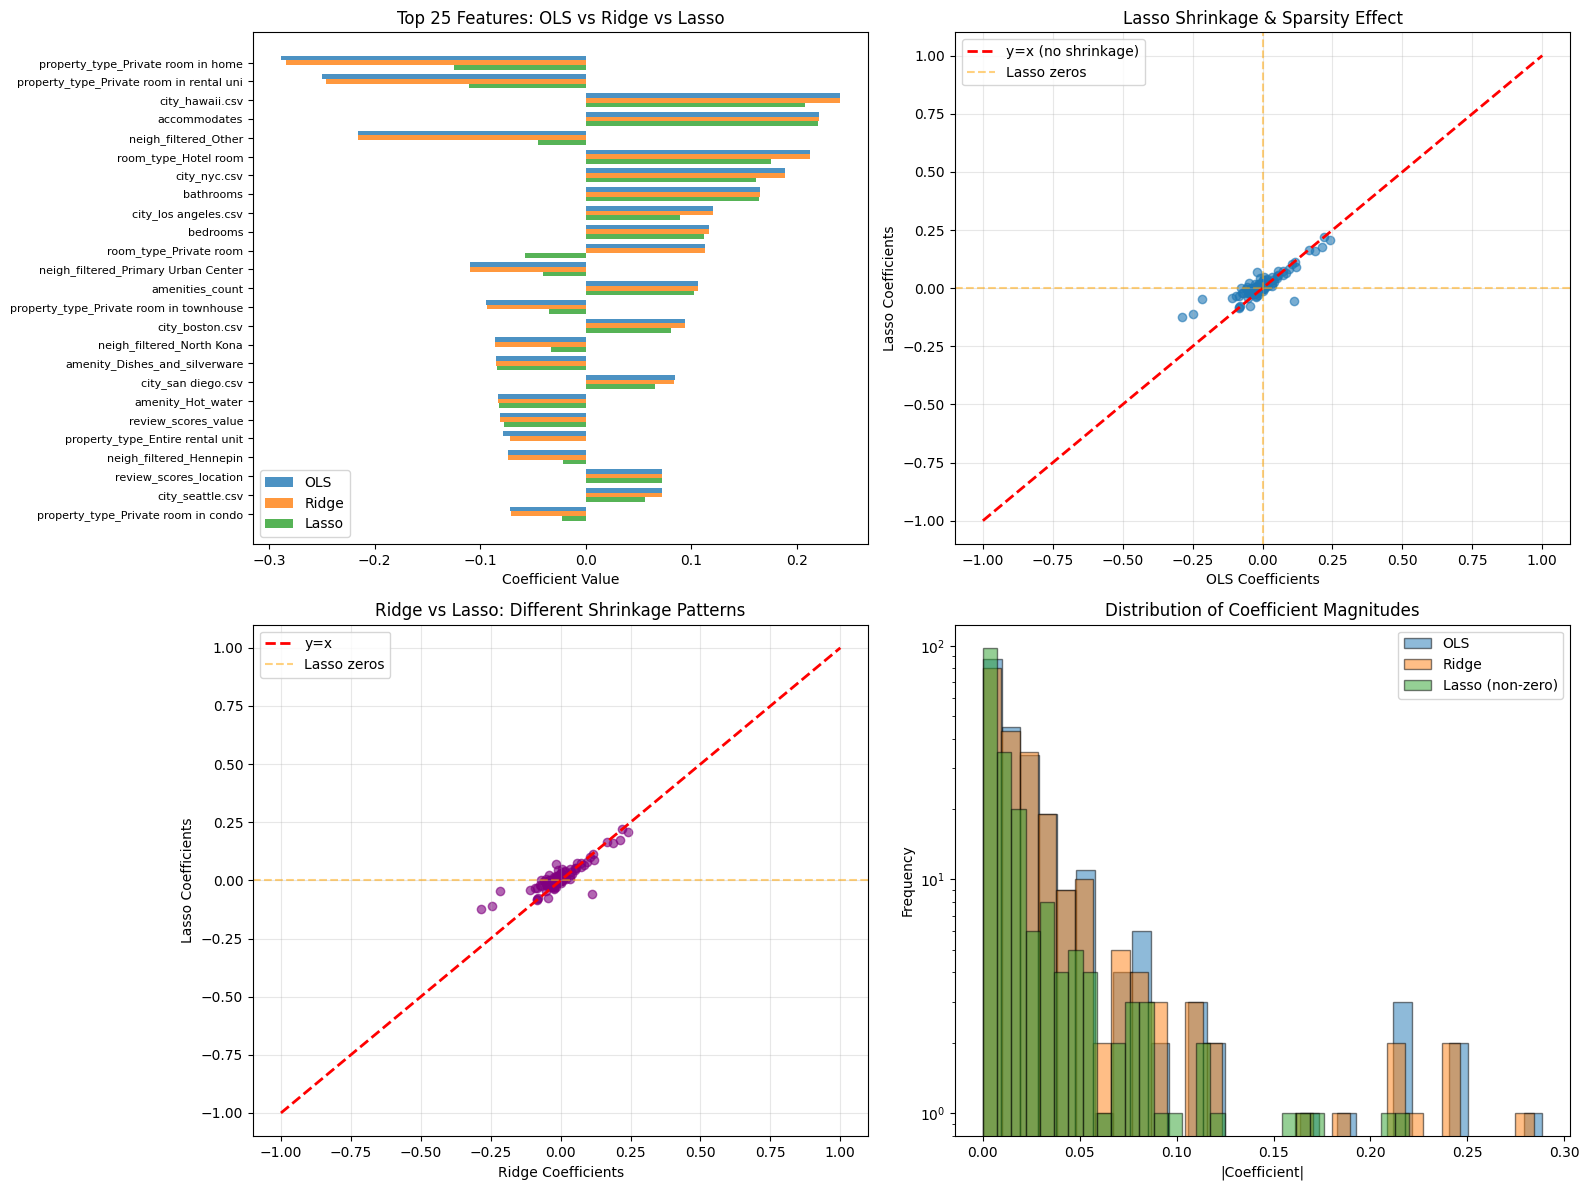

In [ ]:
# Visualize coefficient comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top features - OLS vs Ridge vs Lasso
top_n = 25
top_features = coef_comparison.head(top_n)
x_pos = np.arange(len(top_features))
width = 0.25

axes[0, 0].barh(x_pos - width, top_features['OLS'], width, label='OLS', alpha=0.8)
axes[0, 0].barh(x_pos, top_features['Ridge'], width, label='Ridge', alpha=0.8)
axes[0, 0].barh(x_pos + width, top_features['Lasso'], width, label='Lasso', alpha=0.8)
axes[0, 0].set_yticks(x_pos)
axes[0, 0].set_yticklabels([f[:40] for f in top_features['feature']], fontsize=8)
axes[0, 0].set_xlabel('Coefficient Value')
axes[0, 0].set_title(f'Top {top_n} Features: OLS vs Ridge vs Lasso')
axes[0, 0].legend()
axes[0, 0].invert_yaxis()

# Plot 2: OLS vs Lasso scatter
axes[0, 1].scatter(coef_comparison['OLS'], coef_comparison['Lasso'], alpha=0.6)
axes[0, 1].plot([-1, 1], [-1, 1], 'r--', linewidth=2, label='y=x (no shrinkage)')
axes[0, 1].axhline(y=0, color='orange', linestyle='--', alpha=0.5, label='Lasso zeros')
axes[0, 1].axvline(x=0, color='orange', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel('OLS Coefficients')
axes[0, 1].set_ylabel('Lasso Coefficients')
axes[0, 1].set_title('Lasso Shrinkage & Sparsity Effect')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Ridge vs Lasso scatter
axes[1, 0].scatter(coef_comparison['Ridge'], coef_comparison['Lasso'], alpha=0.6, color='purple')
axes[1, 0].plot([-1, 1], [-1, 1], 'r--', linewidth=2, label='y=x')
axes[1, 0].axhline(y=0, color='orange', linestyle='--', alpha=0.5, label='Lasso zeros')
axes[1, 0].set_xlabel('Ridge Coefficients')
axes[1, 0].set_ylabel('Lasso Coefficients')
axes[1, 0].set_title('Ridge vs Lasso: Different Shrinkage Patterns')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Coefficient magnitude distribution
axes[1, 1].hist(np.abs(ols_coef[np.abs(ols_coef) > 0]), bins=30, alpha=0.5, label='OLS', edgecolor='black')
axes[1, 1].hist(np.abs(ridge_coef[np.abs(ridge_coef) > 0]), bins=30, alpha=0.5, label='Ridge', edgecolor='black')
axes[1, 1].hist(np.abs(lasso_coef[np.abs(lasso_coef) > 1e-10]), bins=30, alpha=0.5, label='Lasso (non-zero)', edgecolor='black')
axes[1, 1].set_xlabel('|Coefficient|')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Coefficient Magnitudes')
axes[1, 1].legend()
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import time

# Prepare data
X = ols_df[all_predictors].copy()
y = ols_df['log_price']

# Drop NaN rows
mask = ~X.isna().any(axis=1)
X = X[mask]
y = y[mask]

# Dummy encode categoricals
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

# Convert to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop remaining NaNs
mask2 = ~X.isna().any(axis=1)
X = X[mask2]
y = y[mask2]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Features: {X_train.shape[1]}")

# Baseline Random Forest with default parameters
print("\nTraining baseline Random Forest...")
start_time = time.time()

rf_baseline = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)
rf_baseline.fit(X_train, y_train)

train_time = time.time() - start_time
print(f"Training time: {train_time:.2f} seconds")

# Predictions
y_train_pred_baseline = rf_baseline.predict(X_train)
y_test_pred_baseline = rf_baseline.predict(X_test)

Training set: 118,001 samples
Test set: 50,573 samples
Features: 233

Training baseline Random Forest...
Training time: 348.21 seconds


In [ ]:
# Evaluate Random Forest
train_rmse_baseline = np.sqrt(mean_squared_error(y_train, y_train_pred_baseline))
test_rmse_baseline = np.sqrt(mean_squared_error(y_test, y_test_pred_baseline))
train_r2_baseline = r2_score(y_train, y_train_pred_baseline)
test_r2_baseline = r2_score(y_test, y_test_pred_baseline)

print(f"\nBaseline Performance:")
print(f"Training RMSE: {train_rmse_baseline:.6f}  |  Test RMSE: {test_rmse_baseline:.6f}")
print(f"Training R²:   {train_r2_baseline:.6f}  |  Test R²:   {test_r2_baseline:.6f}")


Baseline Performance:
Training RMSE: 0.169785  |  Test RMSE: 0.443763
Training R²:   0.965342  |  Test R²:   0.761808


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# HYPERPARAMETER TUNING
print("HYPERPARAMETER TUNING (OPTIMIZED)")

# Simplified parameter grid (most impactful parameters)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']  # Most commonly best option
}

print("\nPerforming Randomized Search")

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=4),  # Limit to 4 cores
    param_distributions=param_grid,
    n_iter=10,  # Reduced from 20
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,  # More detailed output
    random_state=42,
    n_jobs=1  # Sequential CV (more stable)
)

start_time = time.time()
rf_random.fit(X_train, y_train)
tuning_time = time.time() - start_time

print(f"\nTuning completed in {tuning_time/60:.2f} minutes")

HYPERPARAMETER TUNING (OPTIMIZED)

Performing Randomized Search
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  32.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  31.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  32.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  36.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  36.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  21.3s
[CV] END max_depth=20, max_fe

In [ ]:
# USING BEST PARAMETERS FROM HYPERPARAMETER TUNING

print("Best parameters from tuning:")
print("  n_estimators: 100")
print("  max_depth: None")
print("  min_samples_split: 2")
print("  min_samples_leaf: 1")
print("  max_features: sqrt")
print("  Best CV RMSE: 0.467915")

rf_optimized = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nTraining Random Forest with best parameters...")
start_time = time.time()
rf_optimized.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds")

# Get predictions and metrics
y_train_pred_opt = rf_optimized.predict(X_train)
y_test_pred_opt = rf_optimized.predict(X_test)

train_rmse_opt = np.sqrt(mean_squared_error(y_train, y_train_pred_opt))
test_rmse_opt = np.sqrt(mean_squared_error(y_test, y_test_pred_opt))
train_mae_opt = mean_absolute_error(y_train, y_train_pred_opt)
test_mae_opt = mean_absolute_error(y_test, y_test_pred_opt)
train_r2_opt = r2_score(y_train, y_train_pred_opt)
test_r2_opt = r2_score(y_test, y_test_pred_opt)

print(f"\nOptimized Random Forest Performance:")
print(f"Training RMSE: {train_rmse_opt:.6f}  |  Test RMSE: {test_rmse_opt:.6f}")
print(f"Training MAE:  {train_mae_opt:.6f}  |  Test MAE:  {test_mae_opt:.6f}")
print(f"Training R²:   {train_r2_opt:.6f}  |  Test R²:   {test_r2_opt:.6f}")
print(f"\nOverfitting Check:")
print(f"Gap (Train R² - Test R²): {train_r2_opt - test_r2_opt:.6f}")
if (train_r2_opt - test_r2_opt) > 0.10:
    print("⚠️ Some overfitting detected (gap > 0.10)")
else:
    print("✓ Good generalization (gap ≤ 0.10)")

Best parameters from tuning:
  n_estimators: 100
  max_depth: None
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: sqrt
  Best CV RMSE: 0.467915

Training Random Forest with best parameters...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   56.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Training completed in 57.01 seconds


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    6.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.2s



Optimized Random Forest Performance:
Training RMSE: 0.172929  |  Test RMSE: 0.449093
Training MAE:  0.118020  |  Test MAE:  0.313581
Training R²:   0.964047  |  Test R²:   0.756052

Overfitting Check:
Gap (Train R² - Test R²): 0.207994
⚠️ Some overfitting detected (gap > 0.10)


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.7s finished


FEATURE IMPORTANCE ANALYSIS

Top 20 Most Important Features (by impurity reduction):
                           feature  importance
                      accommodates    0.095030
                         bathrooms    0.087399
                              beds    0.063758
                          bedrooms    0.057259
                   amenities_count    0.046517
                  availability_365    0.042833
            room_type_Private room    0.036028
              host_acceptance_rate    0.033057
              room_type_Hotel room    0.032546
            review_scores_location    0.028762
                 number_of_reviews    0.026827
property_type_Private room in home    0.024664
       property_type_Room in hotel    0.022422
                   city_hawaii.csv    0.021508
               review_scores_value    0.018304
              review_scores_rating    0.017543
         review_scores_cleanliness    0.017127
            review_scores_accuracy    0.014998
       review_scores_c

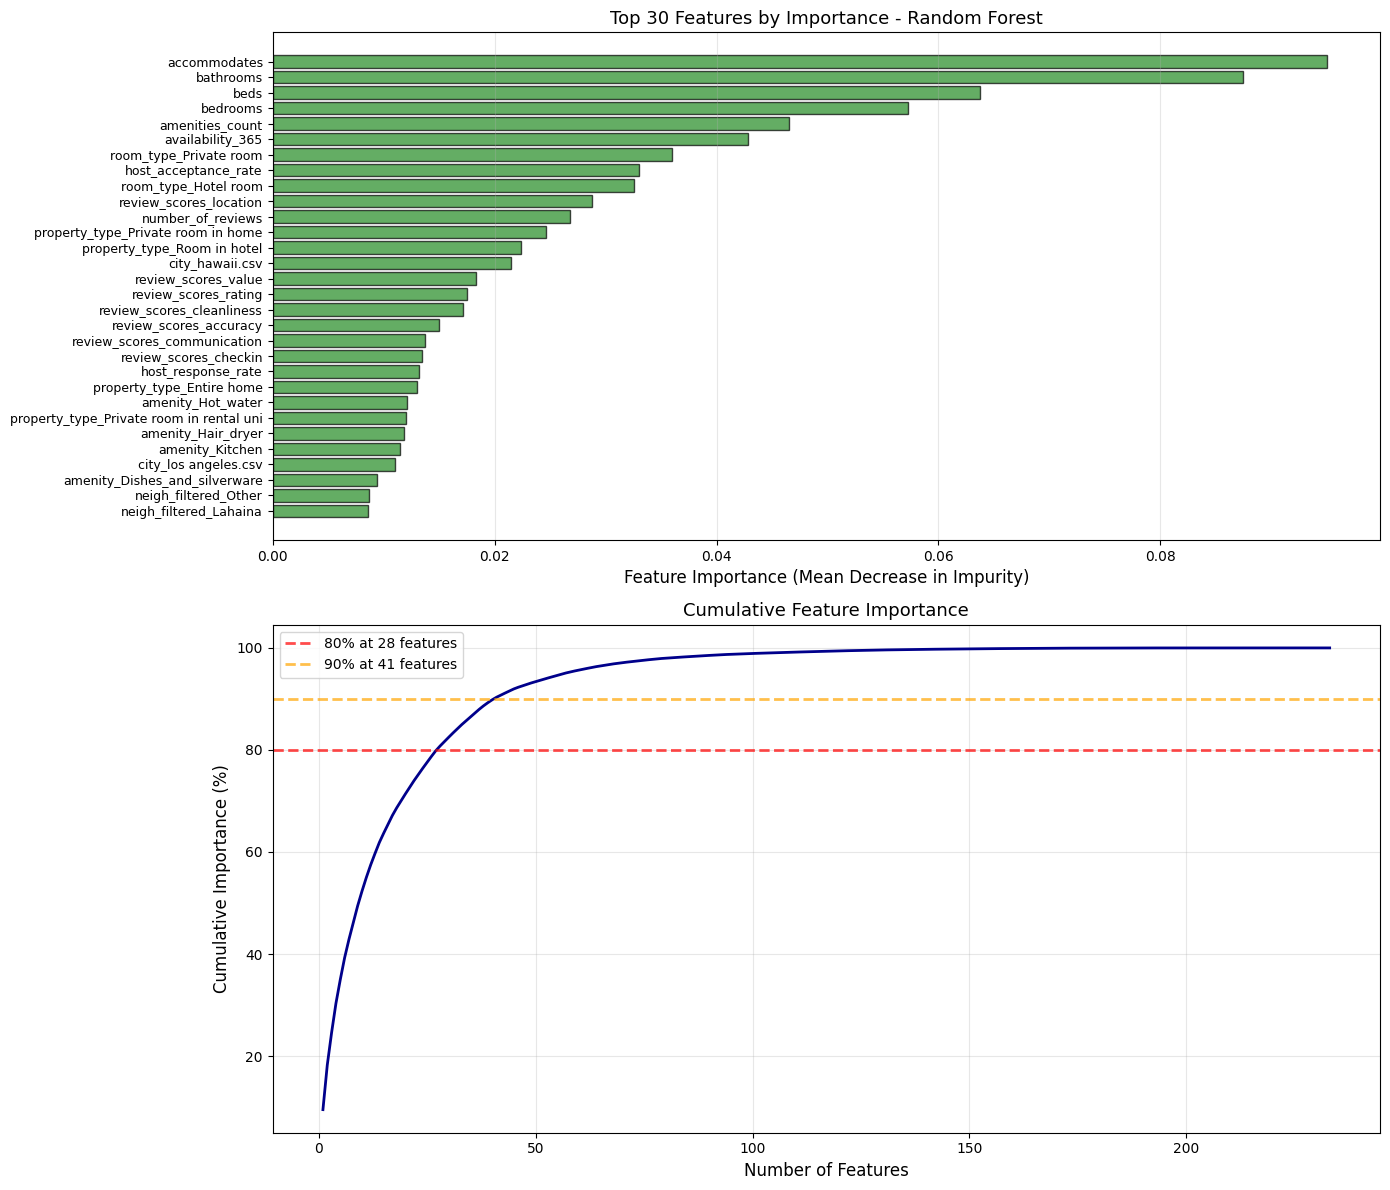


Feature Importance Summary:
- Top 10 features account for 70.0% of total importance
- 28 features needed for 80% of importance
- 41 features needed for 90% of importance


In [ ]:
# FEATURE IMPORTANCE ANALYSIS
print("FEATURE IMPORTANCE ANALYSIS")

# Get feature importances (based on impurity reduction)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_optimized.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 20 Most Important Features (by impurity reduction):")
print(feature_importance.head(20).to_string(index=False))

# Visualize top features
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: Top 30 features
top_30 = feature_importance.head(30)
axes[0].barh(range(len(top_30)), top_30['importance'], color='forestgreen',
            edgecolor='black', alpha=0.7)
axes[0].set_yticks(range(len(top_30)))
axes[0].set_yticklabels([f[:40] for f in top_30['feature']], fontsize=9)
axes[0].set_xlabel('Feature Importance (Mean Decrease in Impurity)', fontsize=12)
axes[0].set_title('Top 30 Features by Importance - Random Forest', fontsize=13)
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Plot 2: Cumulative importance
cumsum_importance = np.cumsum(feature_importance['importance'])
n_features_80 = np.argmax(cumsum_importance >= 0.80) + 1
n_features_90 = np.argmax(cumsum_importance >= 0.90) + 1

axes[1].plot(range(1, len(feature_importance)+1), cumsum_importance * 100,
            linewidth=2, color='darkblue')
axes[1].axhline(y=80, color='r', linestyle='--', linewidth=2, alpha=0.7,
               label=f'80% at {n_features_80} features')
axes[1].axhline(y=90, color='orange', linestyle='--', linewidth=2, alpha=0.7,
               label=f'90% at {n_features_90} features')
axes[1].set_xlabel('Number of Features', fontsize=12)
axes[1].set_ylabel('Cumulative Importance (%)', fontsize=12)
axes[1].set_title('Cumulative Feature Importance', fontsize=13)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFeature Importance Summary:")
print(f"- Top 10 features account for {cumsum_importance[9]*100:.1f}% of total importance")
print(f"- {n_features_80} features needed for 80% of importance")
print(f"- {n_features_90} features needed for 90% of importance")

PREDICTED VS ACTUAL ANALYSIS


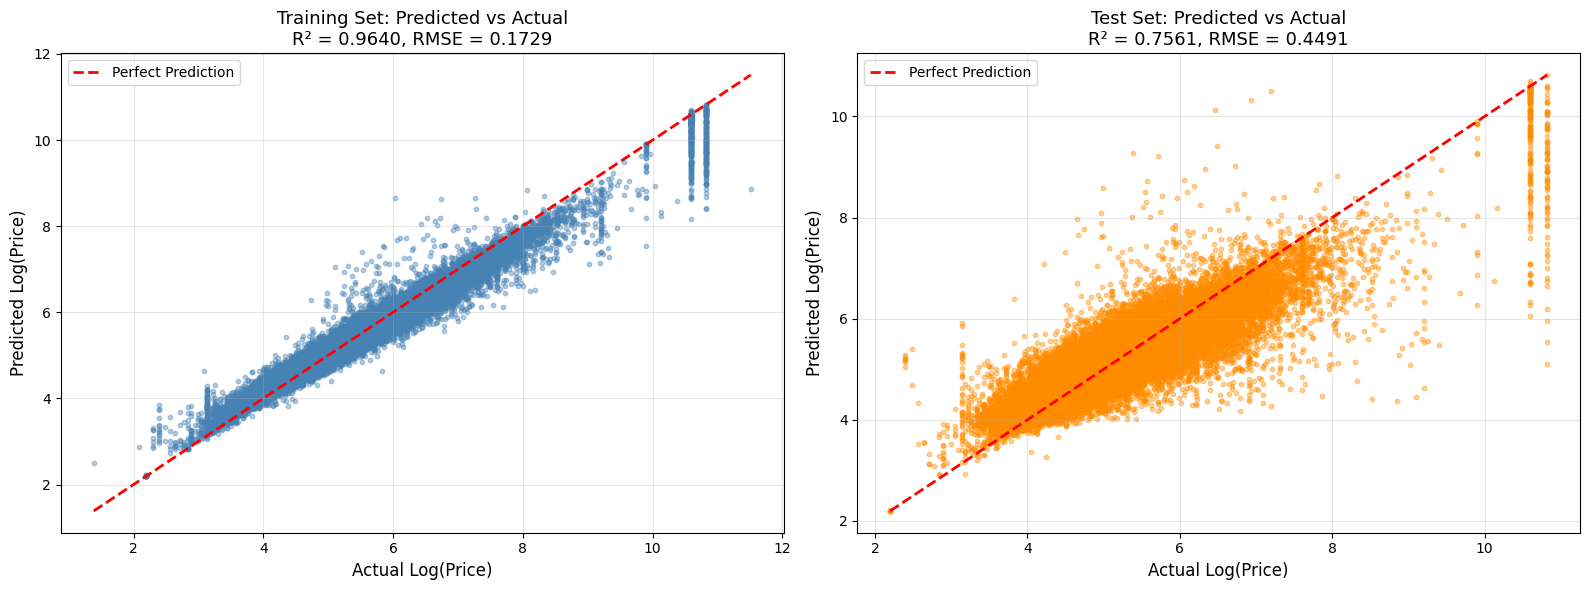

In [ ]:
# PREDICTED VS ACTUAL PLOT
print("PREDICTED VS ACTUAL ANALYSIS")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_train_pred_opt, alpha=0.4, s=10, color='steelblue')
axes[0].plot([y_train.min(), y_train.max()],
            [y_train.min(), y_train.max()],
            'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Log(Price)', fontsize=12)
axes[0].set_ylabel('Predicted Log(Price)', fontsize=12)
axes[0].set_title(f'Training Set: Predicted vs Actual\nR² = {train_r2_opt:.4f}, RMSE = {train_rmse_opt:.4f}',
                 fontsize=13)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred_opt, alpha=0.4, s=10, color='darkorange')
axes[1].plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Log(Price)', fontsize=12)
axes[1].set_ylabel('Predicted Log(Price)', fontsize=12)
axes[1].set_title(f'Test Set: Predicted vs Actual\nR² = {test_r2_opt:.4f}, RMSE = {test_rmse_opt:.4f}',
                 fontsize=13)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

RESIDUAL ANALYSIS


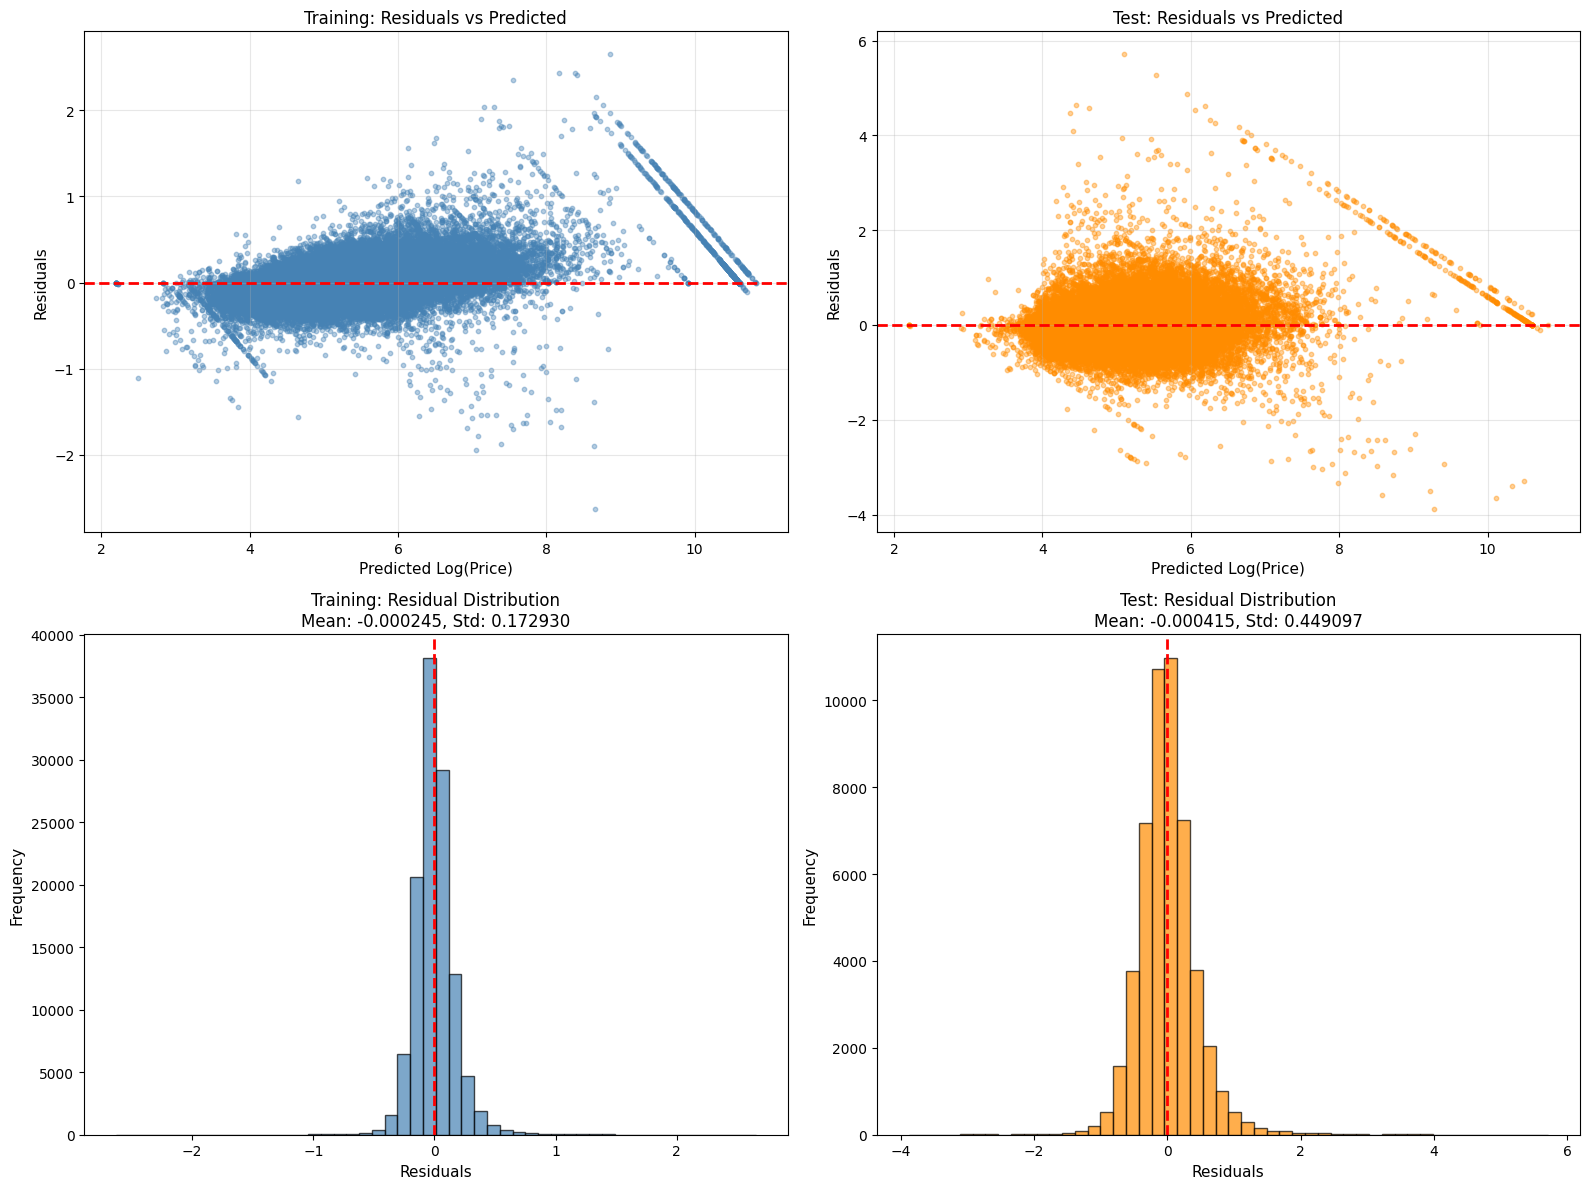


Residual Statistics:
Training - Mean: -0.000245, Std: 0.172930
Test     - Mean: -0.000415, Std: 0.449097


In [ ]:
# RESIDUAL ANALYSIS
print("RESIDUAL ANALYSIS")

# Calculate residuals
train_residuals = y_train - y_train_pred_opt
test_residuals = y_test - y_test_pred_opt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Residuals vs Predicted (Training)
axes[0, 0].scatter(y_train_pred_opt, train_residuals, alpha=0.4, s=10, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Log(Price)', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Training: Residuals vs Predicted', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals vs Predicted (Test)
axes[0, 1].scatter(y_test_pred_opt, test_residuals, alpha=0.4, s=10, color='darkorange')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Log(Price)', fontsize=11)
axes[0, 1].set_ylabel('Residuals', fontsize=11)
axes[0, 1].set_title('Test: Residuals vs Predicted', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residual Distribution (Training)
axes[1, 0].hist(train_residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title(f'Training: Residual Distribution\nMean: {train_residuals.mean():.6f}, Std: {train_residuals.std():.6f}',
                    fontsize=12)

# Plot 4: Residual Distribution (Test)
axes[1, 1].hist(test_residuals, bins=50, edgecolor='black', alpha=0.7, color='darkorange')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title(f'Test: Residual Distribution\nMean: {test_residuals.mean():.6f}, Std: {test_residuals.std():.6f}',
                    fontsize=12)

plt.tight_layout()
plt.show()

print("\nResidual Statistics:")
print(f"Training - Mean: {train_residuals.mean():.6f}, Std: {train_residuals.std():.6f}")
print(f"Test     - Mean: {test_residuals.mean():.6f}, Std: {test_residuals.std():.6f}")

# 4. Extension: Market Structure - Supply & Demand Across Cities

In [ ]:
# Compute a supply–demand imbalance score

# SUPPLY = number of listings per city
supply = df.groupby("city").size().rename("supply_listings")

# DEMAND proxies per city
demand = df.groupby("city")[["reviews_per_month", "availability_365"]].mean()

# Merge
supply_demand = pd.concat([supply, demand], axis=1).reset_index()

# Interpret demand:
# high demand → lower availability_365
supply_demand["inv_availability"] = 365 - supply_demand["availability_365"]

# supply-demand imbalance score
supply_demand["supply_demand_ratio"] = (
    supply_demand["supply_listings"] / supply_demand["inv_availability"]
)

print(supply_demand)

               city  supply_listings  reviews_per_month  availability_365  \
0        austin.csv            10708           1.524533        234.149047   
1        boston.csv             3695           1.461713        226.689851   
2       chicago.csv             7681           1.565452        231.978128   
3      columbus.csv             2594           2.051665        237.365844   
4        dallas.csv             5373           1.759200        264.543458   
5            dc.csv             4846           1.920116        228.438093   
6        denver.csv             4238           1.724066        221.221095   
7        hawaii.csv            32172           0.922111        231.889718   
8   los angeles.csv            36405           1.129471        247.247191   
9     nashville.csv             6854           2.294317        256.907062   
10  new orleans.csv             6373           1.442766        245.413463   
11          nyc.csv            21279           0.811881        248.451713   

In [ ]:
# Price Dispersion by City

price_dispersion = df.groupby("city")["price"].agg(
    ["mean", "median", "std", "min", "max"]
)

price_dispersion["IQR"] = (
    df.groupby("city")["price"].quantile(0.75) -
    df.groupby("city")["price"].quantile(0.25)
)

price_dispersion["P90/P10"] = (
    df.groupby("city")["price"].quantile(0.90) /
    df.groupby("city")["price"].quantile(0.10)
)

print(price_dispersion.sort_values("std", ascending=False))

                       mean  median          std   min       max    IQR  \
city                                                                      
boston.csv       736.230041   193.0  4652.221674  27.0   50096.0  185.0   
hawaii.csv       906.443553   247.0  4519.597751   9.0  100000.0  277.0   
san diego.csv    706.457170   211.0  4023.428754   9.0   50045.0  254.0   
chicago.csv      577.542638   169.0  3879.018782  13.0   50328.0  187.0   
new orleans.csv  537.220461   135.0  3745.723911  16.0   50000.0  133.0   
seattle.csv      473.938494   177.0  3290.410859  10.0   50034.0  150.0   
nyc.csv          447.871611   150.0  3174.205888   3.0   50052.0  167.0   
dc.csv           392.255675   135.0  3126.668006  10.0   50000.0  107.0   
dallas.csv       386.698492   110.0  3088.202571  11.0   50000.0   98.0   
portland.csv     336.275014   110.0  2788.637612  27.0   50000.0   84.0   
austin.csv       386.470583   138.0  2620.198322   9.0   50000.0  146.0   
twin cities.csv  260.1267

In [ ]:
# Compute city-level supply + prices

city_summary = df.groupby("city").agg(
    supply=("city", "size"),
    median_price=("price", "median"),
    avg_price=("price", "mean"),
    avg_reviews=("reviews_per_month", "mean"),
    avg_availability=("availability_365", "mean")
).reset_index()

# inverse availability = demand proxy
city_summary["inv_availability"] = 365 - city_summary["avg_availability"]

In [ ]:
X = city_summary[["supply", "inv_availability"]]
X = sm.add_constant(X)
y = city_summary["median_price"]

supply_model = sm.OLS(y, X).fit()
print(supply_model.summary())

                            OLS Regression Results                            
Dep. Variable:           median_price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     5.653
Date:                Sun, 30 Nov 2025   Prob (F-statistic):             0.0171
Time:                        22:11:30   Log-Likelihood:                -75.609
No. Observations:                  16   AIC:                             157.2
Df Residuals:                      13   BIC:                             159.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.7249     78.205  

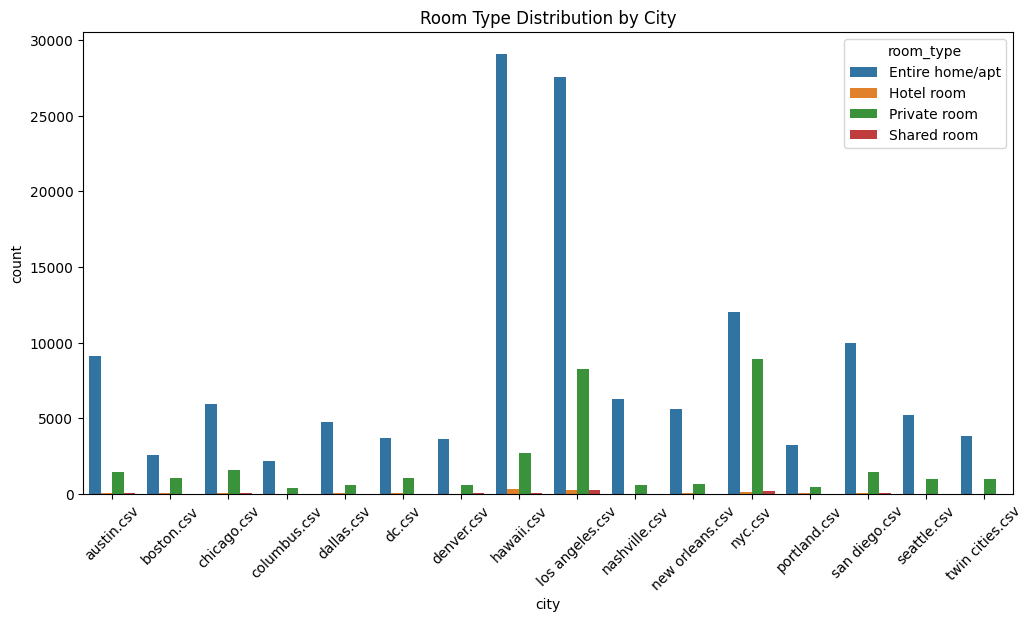

In [ ]:
# Room Type Mix by City

room_mix = df.groupby(["city", "room_type"]).size().reset_index(name="count")

plt.figure(figsize=(12,6))
sns.barplot(data=room_mix, x="city", y="count", hue="room_type")
plt.xticks(rotation=45)
plt.title("Room Type Distribution by City")
plt.show()

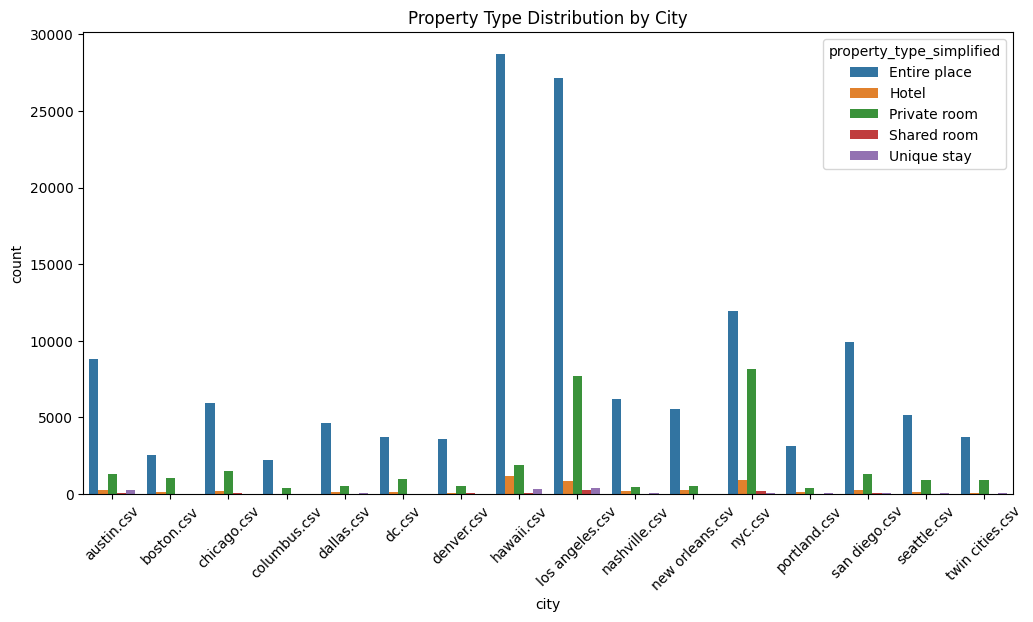

In [ ]:
# Property Type Mix (Simplified Categories)

prop_mix = df.groupby(["city", "property_type_simplified"]).size().reset_index(name="count")

plt.figure(figsize=(12,6))
sns.barplot(data=prop_mix, x="city", y="count", hue="property_type_simplified")
plt.xticks(rotation=45)
plt.title("Property Type Distribution by City")
plt.show()